
# Reporte de Riesgo Mercado

Equipo 3

- Arturo Hernández Pereztagle			A00838056
- José Eduardo López Arzamendi			A00836314
- Jose Miguel Ruiz de la Garza			A01722268
- Juan Marco Castro Trinidad			A01742821

In [564]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar estilo de visualización
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

## 1. Cargar Datos y Definir Variables

In [565]:
# Convierte el excel a csv
import pandas as pd

def excel_a_csv(ruta_excel, ruta_csv):
    # Lee el archivo Excel
    df = pd.read_excel(ruta_excel)
    
    # Guarda el DataFrame como un archivo CSV
    df.to_csv(ruta_csv, index=False)

if __name__ == "__main__":
    ruta_excel = "precios_historicos.xlsx"
    ruta_csv = "precios_historicos.csv"
    excel_a_csv(ruta_excel, ruta_csv)
    print(f"Archivo convertido de {ruta_excel} a {ruta_csv}")

Archivo convertido de precios_historicos.xlsx a precios_historicos.csv


In [566]:
# Cargar datos históricos
df = pd.read_csv('precios_historicos.csv')

# Mostrar primeras filas
print("Datos cargados:")
print(df.head())
print(f"\nDimensiones: {df.shape}")
print(f"\nColumnas: {df.columns.tolist()}")

Datos cargados:
         Date  Día  NVDA.O  AAPL.O     LMT  MSFT.O  SIEGn.DE eur  \
0  2025-12-01    1  179.50  280.67  443.54  488.66         226.2   
1  2025-11-28    2  177.00  278.85  457.86  492.01         228.3   
2  2025-11-26    3  180.26  277.55  454.16  485.50         228.1   
3  2025-11-25    4  177.82  276.97  452.41  476.99         227.0   
4  2025-11-24    5  182.55  275.92  451.06  474.00         223.0   

   SIEGn.DE Usd  GOOGL.O  INTC.O    EUR=  
0     262.61820   314.89   40.01  1.1610  
1     264.71385   320.18   40.56  1.1595  
2     264.45914   319.95   36.81  1.1594  
3     262.61630   323.44   35.83  1.1569  
4     256.89600   318.58   35.79  1.1520  

Dimensiones: (1063, 11)

Columnas: ['Date', 'Día', 'NVDA.O', 'AAPL.O', 'LMT', 'MSFT.O', 'SIEGn.DE eur', 'SIEGn.DE Usd', 'GOOGL.O', 'INTC.O', 'EUR=']


In [567]:
# Definir el número de acciones de cada empresa
acciones = {
    'SIEGn.DE Usd': 369,
    'AAPL.O': 528,
    'LMT': 217,
    'MSFT.O': 200,
    'NVDA.O': 1892,    
    'GOOGL.O': 381,
    'INTC.O': 1436,
}

print("Número de acciones por empresa:")
for empresa, num_acciones in acciones.items():
    print(f"{empresa}: {num_acciones}")

Número de acciones por empresa:
SIEGn.DE Usd: 369
AAPL.O: 528
LMT: 217
MSFT.O: 200
NVDA.O: 1892
GOOGL.O: 381
INTC.O: 1436


## 2. Calcular V0 (Valor del Portafolio)

In [568]:
# Calcular V0 (valor del portafolio) para cada día
# V0 = suma de (precio * número de acciones) para todas las empresas

df['V0'] = 0
for empresa, num_acciones in acciones.items():
    if empresa in df.columns:
        df['V0'] += df[empresa] * num_acciones
    else:
        print(f"Advertencia: {empresa} no encontrada en el DataFrame")

print("V0 calculado para cada día:")
print(df[['Date', 'Día', 'V0']].head(10))
print(f"\nV0 actual (día más reciente): ${df['V0'].iloc[0]:,.2f}")

V0 calculado para cada día:
         Date  Día             V0
0  2025-12-01    1  956121.505800
1  2025-11-28    2  957786.570650
2  2025-11-26    3  955596.572660
3  2025-11-25    4  947834.504700
4  2025-11-24    5  951318.424000
5  2025-11-21    6  932998.655485
6  2025-11-20    7  932252.136930
7  2025-11-19    8  949121.858240
8  2025-11-18    9  936930.121565
9  2025-11-17   10  951730.153000

V0 actual (día más reciente): $956,121.51


## 3. Calcular P&L (Profit and Loss)

In [569]:
# Calcular P&L: diferencia entre el V0 del día actual y el V0 del día anterior
# P&L = V0_actual - V0_anterior
# Como los datos están ordenados del más reciente al más antiguo, usamos shift(-1)

df['P&L'] = df['V0'] - df['V0'].shift(-1)

# El último día no tiene P&L porque no hay día siguiente
print("P&L calculado:")
print(df[['Date', 'Día', 'V0', 'P&L']].head(10))
print(f"\nNúmero de P&L calculados: {df['P&L'].notna().sum()}")

P&L calculado:
         Date  Día             V0           P&L
0  2025-12-01    1  956121.505800  -1665.064850
1  2025-11-28    2  957786.570650   2189.997990
2  2025-11-26    3  955596.572660   7762.067960
3  2025-11-25    4  947834.504700  -3483.919300
4  2025-11-24    5  951318.424000  18319.768515
5  2025-11-21    6  932998.655485    746.518555
6  2025-11-20    7  932252.136930 -16869.721310
7  2025-11-19    8  949121.858240  12191.736675
8  2025-11-18    9  936930.121565 -14800.031435
9  2025-11-17   10  951730.153000 -10099.999300

Número de P&L calculados: 1062


## 4. Calcular Ranked P&L

In [570]:
# Ranked P&L: ordenar el P&L de menor a mayor
df['Ranked_P&L'] = df['P&L'].rank(method='min', na_option='keep')

print("Ranked P&L:")
print(df[['Date', 'Día', 'P&L', 'Ranked_P&L']].dropna().head(10))
print("\nP&L más bajo (peores pérdidas):")
print(df[['Date', 'Día', 'P&L', 'Ranked_P&L']].nsmallest(5, 'P&L'))

Ranked P&L:
         Date  Día           P&L  Ranked_P&L
0  2025-12-01    1  -1665.064850       399.0
1  2025-11-28    2   2189.997990       634.0
2  2025-11-26    3   7762.067960       894.0
3  2025-11-25    4  -3483.919300       289.0
4  2025-11-24    5  18319.768515      1045.0
5  2025-11-21    6    746.518555       553.0
6  2025-11-20    7 -16869.721310        28.0
7  2025-11-19    8  12191.736675       995.0
8  2025-11-18    9 -14800.031435        39.0
9  2025-11-17   10 -10099.999300        80.0

P&L más bajo (peores pérdidas):
           Date  Día           P&L  Ranked_P&L
213  2025-01-27  214 -49208.154805         1.0
165  2025-04-04  166 -40697.616610         2.0
166  2025-04-03  167 -35888.412525         3.0
312  2024-09-03  313 -32370.456252         4.0
11   2025-11-13   12 -30860.442620         5.0


## 5. Calcular Rendimiento

In [571]:
# Calcular Rendimiento: (V0_actual / V0_anterior) - 1
df['Rendimiento'] = ((df['V0'] / df['V0'].shift(-1)) - 1).shift(1)

print("Rendimiento calculado:")
print(df[['Date', 'Día', 'V0', 'Rendimiento']].head(10))

# Estadísticas del rendimiento
print("\n" + "="*50)
print("ESTADÍSTICAS DEL RENDIMIENTO")
print("="*50)
print(f"Rendimiento promedio: {df['Rendimiento'].mean():.6f}")
print(f"Desviación estándar: {df['Rendimiento'].std():.6f}")
print(f"Rendimiento mínimo: {df['Rendimiento'].min():.6f}")
print(f"Rendimiento máximo: {df['Rendimiento'].max():.6f}")

Rendimiento calculado:
         Date  Día             V0  Rendimiento
0  2025-12-01    1  956121.505800          NaN
1  2025-11-28    2  957786.570650    -0.001738
2  2025-11-26    3  955596.572660     0.002292
3  2025-11-25    4  947834.504700     0.008189
4  2025-11-24    5  951318.424000    -0.003662
5  2025-11-21    6  932998.655485     0.019635
6  2025-11-20    7  932252.136930     0.000801
7  2025-11-19    8  949121.858240    -0.017774
8  2025-11-18    9  936930.121565     0.013012
9  2025-11-17   10  951730.153000    -0.015551

ESTADÍSTICAS DEL RENDIMIENTO
Rendimiento promedio: 0.000831
Desviación estándar: 0.014513
Rendimiento mínimo: -0.063822
Rendimiento máximo: 0.113003
Desviación estándar: 0.014513
Rendimiento mínimo: -0.063822
Rendimiento máximo: 0.113003


In [572]:
# Guardar variables importantes para usar en cálculos posteriores
rendimiento_promedio = df['Rendimiento'].mean()
desviacion_estandar = df['Rendimiento'].std()
V0_hoy = df['V0'].iloc[0]  # Valor más reciente del portafolio

print(f"\nVariables guardadas:")
print(f"Rendimiento Promedio: {rendimiento_promedio:.6f}")
print(f"Desviación Estándar: {desviacion_estandar:.6f}")
print(f"V0 Actual: ${V0_hoy:,.2f}")



Variables guardadas:
Rendimiento Promedio: 0.000831
Desviación Estándar: 0.014513
V0 Actual: $956,121.51


## 6. Calcular VaR Paramétrico

In [573]:
# ============================================================================
# VaR PARAMÉTRICO CON VENTANA MÓVIL DE 1,000 DÍAS
# ============================================================================
# Para cada día, calculamos el VaR usando los 1,000 días anteriores

# Configuración
ventana = 1000  # Días de historia para calcular promedio y desviación

# Valores z para diferentes niveles de confianza
z_99 = 2.326  # 99% de confianza (1% VaR)
z_95 = 1.645  # 95% de confianza (5% VaR)

print("="*80)
print("VaR PARAMÉTRICO CON VENTANA MÓVIL DE 1,000 DÍAS")
print("="*80)

# Listas para almacenar resultados
var_rolling = []

# Solo podemos calcular VaR para días que tienen 1000 días previos
# Como los datos van del más reciente (índice 0) al más antiguo (índice N),
# necesitamos que haya al menos 1000 días hacia adelante (índices mayores)
num_dias_disponibles = len(df) - ventana

print(f"\n📊 Información:")
print(f"   Total de días en el dataset: {len(df)}")
print(f"   Ventana de cálculo: {ventana} días")
print(f"   Días con VaR calculable: {num_dias_disponibles}")
print(f"   (desde el día más reciente hasta el día {num_dias_disponibles})")

# Calcular VaR para cada día que tenga suficiente historia
for i in range(num_dias_disponibles):
    # Para el día i (índice i), tomamos los rendimientos desde i+1 hasta i+1000
    # Estos son los 1000 días ANTERIORES al día i
    rendimientos_ventana = df['Rendimiento'].iloc[i+1:i+1+ventana]
    
    # Calcular estadísticas de la ventana
    rendimiento_promedio = rendimientos_ventana.mean()
    desviacion_estandar = rendimientos_ventana.std()
    V0_dia = df['V0'].iloc[i]
    
    # Calcular VaR paramétrico para este día
    # Fórmula: VaR = V0 * (rendimiento_promedio - z * desviación_estándar)
    VaR_1pct = V0_dia * (rendimiento_promedio - z_99 * desviacion_estandar)
    VaR_5pct = V0_dia * (rendimiento_promedio - z_95 * desviacion_estandar)
    
    # Guardar resultados
    var_rolling.append({
        'Dia': df['Día'].iloc[i],
        'Date': df['Date'].iloc[i],
        'V0': V0_dia,
        'Rendimiento_Promedio': rendimiento_promedio,
        'Desviacion_Estandar': desviacion_estandar,
        'VaR_1pct': abs(VaR_1pct),
        'VaR_5pct': abs(VaR_5pct),
        'VaR_1pct_pct': abs((VaR_1pct / V0_dia) * 100),
        'VaR_5pct_pct': abs((VaR_5pct / V0_dia) * 100)
    })

# Crear DataFrame con resultados
df_var_rolling = pd.DataFrame(var_rolling)

print(f"\n✅ VaR calculado para {len(df_var_rolling)} días")
print(f"\n📅 PRIMEROS 10 DÍAS:")
print(df_var_rolling[['Date', 'Dia', 'V0', 'VaR_1pct', 'VaR_1pct_pct', 'VaR_5pct', 'VaR_5pct_pct']].head(10).to_string(index=False))

# Mostrar el VaR del día más reciente (2025-12-01)
print("\n" + "="*80)
print(f"VaR PARAMÉTRICO PARA EL DÍA MÁS RECIENTE: {df_var_rolling['Date'].iloc[0]}")
print("="*80)

VaR_parametrico_1pct = df_var_rolling['VaR_1pct'].iloc[0]
VaR_parametrico_5pct = df_var_rolling['VaR_5pct'].iloc[0]
rendimiento_promedio = df_var_rolling['Rendimiento_Promedio'].iloc[0]
desviacion_estandar = df_var_rolling['Desviacion_Estandar'].iloc[0]

print(f"\n📊 Estadísticas de la ventana de 1,000 días:")
print(f"   Rendimiento Promedio: {rendimiento_promedio:.6f}")
print(f"   Desviación Estándar:  {desviacion_estandar:.6f}")

print(f"\n1% VaR (99% confianza):")
print(f"  Pérdida máxima esperada: ${abs(VaR_parametrico_1pct):,.2f}")
print(f"  Porcentaje del portafolio: {abs(VaR_parametrico_1pct/V0_hoy)*100:.2f}%")

print(f"\n5% VaR (95% confianza):")
print(f"  Pérdida máxima esperada: ${abs(VaR_parametrico_5pct):,.2f}")
print(f"  Porcentaje del portafolio: {abs(VaR_parametrico_5pct/V0_hoy)*100:.2f}%")

print(f"\nValor del portafolio actual: ${V0_hoy:,.2f}")

print("\n" + "="*80)
print("⚠️  NOTA IMPORTANTE:")
print("="*80)
print(f"Este VaR se calculó usando una VENTANA MÓVIL de {ventana} días.")
print(f"Para cada día, se toma el promedio y desviación estándar de los {ventana} días")
print(f"ANTERIORES a ese día, reflejando el riesgo basado en historia reciente.")
print("="*80)


VaR PARAMÉTRICO CON VENTANA MÓVIL DE 1,000 DÍAS

📊 Información:
   Total de días en el dataset: 1063
   Ventana de cálculo: 1000 días
   Días con VaR calculable: 63
   (desde el día más reciente hasta el día 63)

✅ VaR calculado para 63 días

📅 PRIMEROS 10 DÍAS:
      Date  Dia            V0     VaR_1pct  VaR_1pct_pct     VaR_5pct  VaR_5pct_pct
2025-12-01    1 956121.505800 32039.926426      3.351031 22429.625619      2.345897
2025-11-28    2 957786.570650 32090.121101      3.350446 22462.860373      2.345289
2025-11-26    3 955596.572660 32015.009128      3.350264 22409.145432      2.345042
2025-11-25    4 947834.504700 31789.791100      3.353939 22258.038385      2.348304
2025-11-24    5 951318.424000 31906.793225      3.353955 22339.986300      2.348318
2025-11-21    6 932998.655485 31280.877495      3.352725 21905.005867      2.347807
2025-11-20    7 932252.136930 31253.523840      3.352475 21884.902478      2.347530
2025-11-19    8 949121.858240 31780.874399      3.348450 22244.04

In [574]:
df_var_rolling

,Dia,Date,V0,Rendimiento_Promedio,Desviacion_Estandar,VaR_1pct,VaR_5pct,VaR_1pct_pct,VaR_5pct_pct
0,1,2025-12-01,956121.505800,0.000821,0.014760,32039.926426,22429.625619,3.351031,2.345897
1,2,2025-11-28,957786.570650,0.000827,0.014760,32090.121101,22462.860373,3.350446,2.345289
2,3,2025-11-26,955596.572660,0.000831,0.014761,32015.009128,22409.145432,3.350264,2.345042
3,4,2025-11-25,947834.504700,0.000809,0.014767,31789.791100,22258.038385,3.353939,2.348304
4,5,2025-11-24,951318.424000,0.000809,0.014767,31906.793225,22339.986300,3.353955,2.348318
...,...,...,...,...,...,...,...,...,...
58,59,2025-09-09,870774.504900,0.000768,0.014599,28901.306583,20243.850214,3.319035,2.324810
59,60,2025-09-08,867738.755570,0.000779,0.014606,28803.651973,20172.642833,3.319392,2.324737
60,61,2025-09-05,864639.849800,0.000787,0.014609,28701.303462,20098.967992,3.319452,2.324548
61,62,2025-09-04,874847.825405,0.000801,0.014604,29017.486306,20316.733321,3.316861,2.322316


## 7. Calcular VaR No Paramétrico (Histórico)

In [575]:
# ============================================================================
# VaR NO PARAMÉTRICO (HISTÓRICO) CON VENTANA MÓVIL DE 1,000 DÍAS
# ============================================================================
# Para cada día, calculamos el VaR histórico usando los 1,000 días anteriores

print("="*80)
print("VaR NO PARAMÉTRICO (HISTÓRICO) CON VENTANA MÓVIL DE 1,000 DÍAS")
print("="*80)

# Configuración
ventana = 1000  # Días de historia para calcular percentiles

# Percentiles para diferentes niveles de confianza
percentil_1pct = 0.01  # Para 99% de confianza (1% VaR)
percentil_5pct = 0.05  # Para 95% de confianza (5% VaR)

# Listas para almacenar resultados
var_historico_rolling = []

# Solo podemos calcular VaR para días que tienen 1000 días previos
num_dias_disponibles = len(df) - ventana

print(f"\n📊 Información:")
print(f"   Total de días en el dataset: {len(df)}")
print(f"   Ventana de cálculo: {ventana} días")
print(f"   Días con VaR calculable: {num_dias_disponibles}")
print(f"   (desde el día más reciente hasta el día {num_dias_disponibles})")

# Calcular VaR histórico para cada día que tenga suficiente historia
for i in range(num_dias_disponibles):
    # Para el día i, tomamos los P&L desde i+1 hasta i+1+ventana
    # Estos son los 1000 días ANTERIORES al día i
    # NO usar dropna() aquí para mantener exactamente la ventana que especificamos
    PnL_ventana = df['P&L'].iloc[i:i+ventana]
    
    # Valor del portafolio para el día i
    V0_dia = df['V0'].iloc[i]
    
    # Calcular VaR histórico usando quantile
    # quantile() automáticamente ignora NaN, pero mantiene la distribución correcta
    # quantile(0.01) = percentil 1% (99% confianza)
    # quantile(0.05) = percentil 5% (95% confianza)
    VaR_hist_1pct = PnL_ventana.quantile(percentil_1pct)
    VaR_hist_5pct = PnL_ventana.quantile(percentil_5pct)
    
    num_obs_ventana = PnL_ventana.notna().sum()  # Contar solo valores no-NaN
    
    # Guardar resultados
    var_historico_rolling.append({
        'Dia': df['Día'].iloc[i],
        'Date': df['Date'].iloc[i],
        'V0': V0_dia,
        'VaR_hist_1pct': VaR_hist_1pct,
        'VaR_hist_5pct': VaR_hist_5pct,
        'VaR_hist_1pct_pct': (VaR_hist_1pct / V0_dia) * 100,
        'VaR_hist_5pct_pct': (VaR_hist_5pct / V0_dia) * 100,
        'Num_Obs': num_obs_ventana
    })

# Crear DataFrame con resultados
df_var_historico_rolling = pd.DataFrame(var_historico_rolling)

print(f"\n✅ VaR histórico calculado para {len(df_var_historico_rolling)} días")
print(f"\n📅 PRIMEROS 10 DÍAS:")
print(df_var_historico_rolling[['Date', 'Dia', 'V0', 'VaR_hist_1pct', 'VaR_hist_1pct_pct', 'VaR_hist_5pct', 'VaR_hist_5pct_pct']].head(10).to_string(index=False))

# Mostrar el VaR del día más reciente
print("\n" + "="*80)
print(f"VaR HISTÓRICO PARA EL DÍA MÁS RECIENTE: {df_var_historico_rolling['Date'].iloc[0]}")
print("="*80)

VaR_no_parametrico_1pct = df_var_historico_rolling['VaR_hist_1pct'].iloc[0]
VaR_no_parametrico_5pct = df_var_historico_rolling['VaR_hist_5pct'].iloc[0]

print(f"\n📊 Estadísticas de la ventana de 1,000 días:")
print(f"   Número de observaciones: {df_var_historico_rolling['Num_Obs'].iloc[0]}")

print(f"\n1% VaR (99% confianza):")
print(f"  Pérdida máxima esperada: ${abs(VaR_no_parametrico_1pct):,.2f}")
print(f"  Porcentaje del portafolio: {abs(VaR_no_parametrico_1pct/V0_hoy)*100:.2f}%")

print(f"\n5% VaR (95% confianza):")
print(f"  Pérdida máxima esperada: ${abs(VaR_no_parametrico_5pct):,.2f}")
print(f"  Porcentaje del portafolio: {abs(VaR_no_parametrico_5pct/V0_hoy)*100:.2f}%")

print(f"\nValor del portafolio actual: ${V0_hoy:,.2f}")

print("\n" + "="*80)
print("⚠️  NOTA IMPORTANTE:")
print("="*80)
print(f"Este VaR se calculó usando una VENTANA MÓVIL de {ventana} días.")
print(f"Para cada día, se toman los percentiles del P&L de los {ventana} días")
print(f"ANTERIORES a ese día, reflejando el riesgo histórico basado en datos recientes.")
print("="*80)


VaR NO PARAMÉTRICO (HISTÓRICO) CON VENTANA MÓVIL DE 1,000 DÍAS

📊 Información:
   Total de días en el dataset: 1063
   Ventana de cálculo: 1000 días
   Días con VaR calculable: 63
   (desde el día más reciente hasta el día 63)

✅ VaR histórico calculado para 63 días

📅 PRIMEROS 10 DÍAS:
      Date  Dia            V0  VaR_hist_1pct  VaR_hist_1pct_pct  VaR_hist_5pct  VaR_hist_5pct_pct
2025-12-01    1 956121.505800  -23851.026384          -2.494560  -12771.603482          -1.335772
2025-11-28    2 957786.570650  -23851.026384          -2.490224  -12771.603482          -1.333450
2025-11-26    3 955596.572660  -23851.026384          -2.495931  -12771.603482          -1.336506
2025-11-25    4 947834.504700  -23851.026384          -2.516370  -12771.603482          -1.347451
2025-11-24    5 951318.424000  -23851.026384          -2.507155  -12771.603482          -1.342516
2025-11-21    6 932998.655485  -23851.026384          -2.556384  -12771.603482          -1.368877
2025-11-20    7 932252.136

In [576]:
df_var_historico_rolling

,Dia,Date,V0,VaR_hist_1pct,VaR_hist_5pct,VaR_hist_1pct_pct,VaR_hist_5pct_pct,Num_Obs
0,1,2025-12-01,956121.505800,-23851.026384,-12771.603482,-2.494560,-1.335772,1000
1,2,2025-11-28,957786.570650,-23851.026384,-12771.603482,-2.490224,-1.333450,1000
2,3,2025-11-26,955596.572660,-23851.026384,-12771.603482,-2.495931,-1.336506,1000
3,4,2025-11-25,947834.504700,-23851.026384,-12771.603482,-2.516370,-1.347451,1000
4,5,2025-11-24,951318.424000,-23851.026384,-12771.603482,-2.507155,-1.342516,1000
...,...,...,...,...,...,...,...,...
58,59,2025-09-09,870774.504900,-21115.257341,-11792.406466,-2.424882,-1.354243,1000
59,60,2025-09-08,867738.755570,-21115.257341,-11792.406466,-2.433366,-1.358981,1000
60,61,2025-09-05,864639.849800,-21115.257341,-11792.406466,-2.442087,-1.363852,1000
61,62,2025-09-04,874847.825405,-21115.257341,-11792.406466,-2.413592,-1.347938,1000


In [577]:
# ============================================================================
# COMPARACIÓN: VaR PARAMÉTRICO VS HISTÓRICO (VENTANA MÓVIL)
# ============================================================================

print("="*80)
print("COMPARACIÓN DE MÉTODOS VaR - VENTANA MÓVIL DE 1,000 DÍAS")
print("="*80)

# Fusionar ambos DataFrames para comparación
df_comparacion = df_var_rolling.merge(
    df_var_historico_rolling[['Dia', 'VaR_hist_1pct', 'VaR_hist_5pct', 'VaR_hist_1pct_pct', 'VaR_hist_5pct_pct']],
    on='Dia',
    how='inner'
)

print(f"\n📊 Datos disponibles para comparación: {len(df_comparacion)} días")
print(f"   Desde el día {df_comparacion['Dia'].max()} hasta el día {df_comparacion['Dia'].min()}")

# Mostrar primeros 10 días
print(f"\n📅 PRIMEROS 10 DÍAS DE COMPARACIÓN:")
print(df_comparacion[['Date', 'Dia', 'VaR_1pct', 'VaR_hist_1pct', 'VaR_5pct', 'VaR_hist_5pct']].head(10).to_string(index=False))

# Estadísticas de la diferencia
print("\n" + "="*80)
print("ANÁLISIS DE DIFERENCIAS ENTRE MÉTODOS")
print("="*80)

df_comparacion['Diff_1pct'] = abs(df_comparacion['VaR_hist_1pct']) - abs(df_comparacion['VaR_1pct'])
df_comparacion['Diff_5pct'] = abs(df_comparacion['VaR_hist_5pct']) - abs(df_comparacion['VaR_5pct'])

print(f"\n1% VaR (99% Confianza):")
print(f"   Diferencia promedio: ${df_comparacion['Diff_1pct'].mean():,.2f}")
print(f"   Diferencia máxima:   ${df_comparacion['Diff_1pct'].max():,.2f}")
print(f"   Diferencia mínima:   ${df_comparacion['Diff_1pct'].min():,.2f}")

print(f"\n5% VaR (95% Confianza):")
print(f"   Diferencia promedio: ${df_comparacion['Diff_5pct'].mean():,.2f}")
print(f"   Diferencia máxima:   ${df_comparacion['Diff_5pct'].max():,.2f}")
print(f"   Diferencia mínima:   ${df_comparacion['Diff_5pct'].min():,.2f}")

# Para el día más reciente
print("\n" + "="*80)
print(f"COMPARACIÓN PARA EL DÍA MÁS RECIENTE: {df_comparacion['Date'].iloc[0]}")
print("="*80)

print(f"\n1% VaR (99% Confianza):")
print(f"   Paramétrico:  ${abs(df_comparacion['VaR_1pct'].iloc[0]):,.2f} ({abs(df_comparacion['VaR_1pct_pct'].iloc[0]):.2f}%)")
print(f"   Histórico:    ${abs(df_comparacion['VaR_hist_1pct'].iloc[0]):,.2f} ({abs(df_comparacion['VaR_hist_1pct_pct'].iloc[0]):.2f}%)")
print(f"   Diferencia:   ${abs(df_comparacion['Diff_1pct'].iloc[0]):,.2f}")

print(f"\n5% VaR (95% Confianza):")
print(f"   Paramétrico:  ${abs(df_comparacion['VaR_5pct'].iloc[0]):,.2f} ({abs(df_comparacion['VaR_5pct_pct'].iloc[0]):.2f}%)")
print(f"   Histórico:    ${abs(df_comparacion['VaR_hist_5pct'].iloc[0]):,.2f} ({abs(df_comparacion['VaR_hist_5pct_pct'].iloc[0]):.2f}%)")
print(f"   Diferencia:   ${abs(df_comparacion['Diff_5pct'].iloc[0]):,.2f}")

print("\n" + "="*80)

COMPARACIÓN DE MÉTODOS VaR - VENTANA MÓVIL DE 1,000 DÍAS

📊 Datos disponibles para comparación: 63 días
   Desde el día 63 hasta el día 1

📅 PRIMEROS 10 DÍAS DE COMPARACIÓN:
      Date  Dia     VaR_1pct  VaR_hist_1pct     VaR_5pct  VaR_hist_5pct
2025-12-01    1 32039.926426  -23851.026384 22429.625619  -12771.603482
2025-11-28    2 32090.121101  -23851.026384 22462.860373  -12771.603482
2025-11-26    3 32015.009128  -23851.026384 22409.145432  -12771.603482
2025-11-25    4 31789.791100  -23851.026384 22258.038385  -12771.603482
2025-11-24    5 31906.793225  -23851.026384 22339.986300  -12771.603482
2025-11-21    6 31280.877495  -23851.026384 21905.005867  -12771.603482
2025-11-20    7 31253.523840  -23851.026384 21884.902478  -12771.603482
2025-11-19    8 31780.874399  -23851.026384 22244.047797  -12705.537210
2025-11-18    9 31370.128256  -23851.026384 21958.029673  -12705.537210
2025-11-17   10 31827.223372  -23851.026384 22270.752597  -12370.490109

ANÁLISIS DE DIFERENCIAS ENTRE MÉT

## 8. Visualización Comparativa: Evolución del VaR en el Tiempo

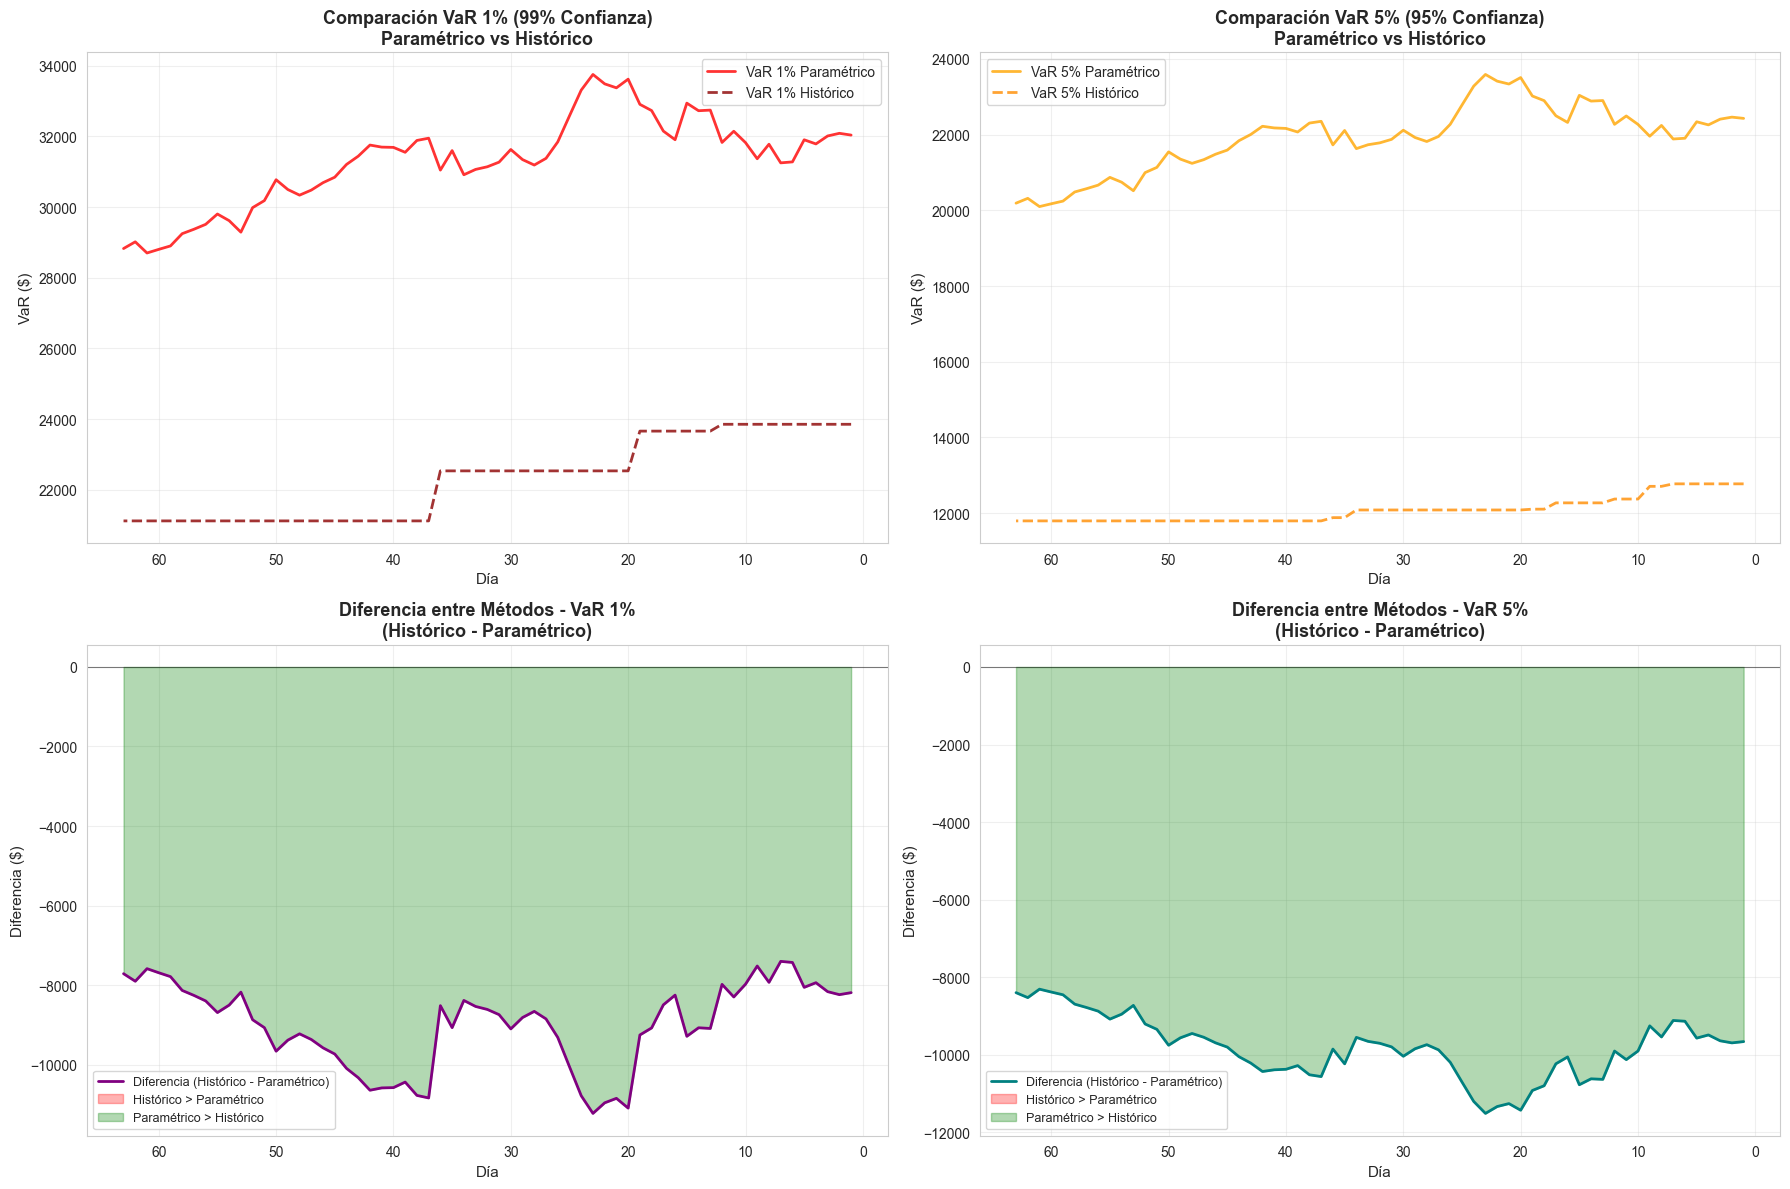

📊 INTERPRETACIÓN DE LAS GRÁFICAS

✅ Gráficos superiores:
   Muestran la evolución temporal de ambos métodos VaR (Paramétrico y Histórico)
   Se puede observar cómo ambos métodos varían con el tiempo según la ventana móvil

✅ Gráficos inferiores:
   Muestran la diferencia entre el VaR Histórico y el VaR Paramétrico
   • Zona ROJA: El método histórico predice MAYOR riesgo que el paramétrico
   • Zona VERDE: El método paramétrico predice MAYOR riesgo que el histórico
   • Línea en cero: Ambos métodos coinciden

💡 Observaciones:
   En 0 de 63 días (0.0%),
   el VaR histórico fue MAYOR que el paramétrico para el nivel de 99% confianza


In [578]:
# ============================================================================
# GRÁFICAS COMPARATIVAS: PARAMÉTRICO VS HISTÓRICO
# ============================================================================

fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# GRÁFICO 1: VaR 1% - Comparación Paramétrico vs Histórico
ax1 = axes[0, 0]
ax1.plot(df_comparacion['Dia'], abs(df_comparacion['VaR_1pct']), 
         linewidth=2, color='red', label='VaR 1% Paramétrico', alpha=0.8)
ax1.plot(df_comparacion['Dia'], abs(df_comparacion['VaR_hist_1pct']), 
         linewidth=2, color='darkred', linestyle='--', label='VaR 1% Histórico', alpha=0.8)
ax1.set_xlabel('Día', fontsize=11)
ax1.set_ylabel('VaR ($)', fontsize=11)
ax1.set_title('Comparación VaR 1% (99% Confianza)\nParamétrico vs Histórico', 
              fontsize=13, fontweight='bold')
ax1.legend(fontsize=10)
ax1.grid(True, alpha=0.3)
ax1.invert_xaxis()

# GRÁFICO 2: VaR 5% - Comparación Paramétrico vs Histórico
ax2 = axes[0, 1]
ax2.plot(df_comparacion['Dia'], abs(df_comparacion['VaR_5pct']), 
         linewidth=2, color='orange', label='VaR 5% Paramétrico', alpha=0.8)
ax2.plot(df_comparacion['Dia'], abs(df_comparacion['VaR_hist_5pct']), 
         linewidth=2, color='darkorange', linestyle='--', label='VaR 5% Histórico', alpha=0.8)
ax2.set_xlabel('Día', fontsize=11)
ax2.set_ylabel('VaR ($)', fontsize=11)
ax2.set_title('Comparación VaR 5% (95% Confianza)\nParamétrico vs Histórico', 
              fontsize=13, fontweight='bold')
ax2.legend(fontsize=10)
ax2.grid(True, alpha=0.3)
ax2.invert_xaxis()

# GRÁFICO 3: Diferencia entre métodos - VaR 1%
ax3 = axes[1, 0]
ax3.plot(df_comparacion['Dia'], df_comparacion['Diff_1pct'], 
         linewidth=2, color='purple', label='Diferencia (Histórico - Paramétrico)')
ax3.axhline(y=0, color='black', linestyle='-', linewidth=0.8, alpha=0.5)
ax3.fill_between(df_comparacion['Dia'], 0, df_comparacion['Diff_1pct'], 
                  where=(df_comparacion['Diff_1pct'] >= 0), alpha=0.3, color='red', 
                  label='Histórico > Paramétrico')
ax3.fill_between(df_comparacion['Dia'], 0, df_comparacion['Diff_1pct'], 
                  where=(df_comparacion['Diff_1pct'] < 0), alpha=0.3, color='green',
                  label='Paramétrico > Histórico')
ax3.set_xlabel('Día', fontsize=11)
ax3.set_ylabel('Diferencia ($)', fontsize=11)
ax3.set_title('Diferencia entre Métodos - VaR 1%\n(Histórico - Paramétrico)', 
              fontsize=13, fontweight='bold')
ax3.legend(fontsize=9)
ax3.grid(True, alpha=0.3)
ax3.invert_xaxis()

# GRÁFICO 4: Diferencia entre métodos - VaR 5%
ax4 = axes[1, 1]
ax4.plot(df_comparacion['Dia'], df_comparacion['Diff_5pct'], 
         linewidth=2, color='teal', label='Diferencia (Histórico - Paramétrico)')
ax4.axhline(y=0, color='black', linestyle='-', linewidth=0.8, alpha=0.5)
ax4.fill_between(df_comparacion['Dia'], 0, df_comparacion['Diff_5pct'], 
                  where=(df_comparacion['Diff_5pct'] >= 0), alpha=0.3, color='red',
                  label='Histórico > Paramétrico')
ax4.fill_between(df_comparacion['Dia'], 0, df_comparacion['Diff_5pct'], 
                  where=(df_comparacion['Diff_5pct'] < 0), alpha=0.3, color='green',
                  label='Paramétrico > Histórico')
ax4.set_xlabel('Día', fontsize=11)
ax4.set_ylabel('Diferencia ($)', fontsize=11)
ax4.set_title('Diferencia entre Métodos - VaR 5%\n(Histórico - Paramétrico)', 
              fontsize=13, fontweight='bold')
ax4.legend(fontsize=9)
ax4.grid(True, alpha=0.3)
ax4.invert_xaxis()

plt.tight_layout()
plt.show()

print("="*80)
print("📊 INTERPRETACIÓN DE LAS GRÁFICAS")
print("="*80)
print("\n✅ Gráficos superiores:")
print("   Muestran la evolución temporal de ambos métodos VaR (Paramétrico y Histórico)")
print("   Se puede observar cómo ambos métodos varían con el tiempo según la ventana móvil")

print("\n✅ Gráficos inferiores:")
print("   Muestran la diferencia entre el VaR Histórico y el VaR Paramétrico")
print("   • Zona ROJA: El método histórico predice MAYOR riesgo que el paramétrico")
print("   • Zona VERDE: El método paramétrico predice MAYOR riesgo que el histórico")
print("   • Línea en cero: Ambos métodos coinciden")

print("\n💡 Observaciones:")
dias_historico_mayor = (df_comparacion['Diff_1pct'] > 0).sum()
porcentaje_mayor = (dias_historico_mayor / len(df_comparacion)) * 100
print(f"   En {dias_historico_mayor} de {len(df_comparacion)} días ({porcentaje_mayor:.1f}%),")
print(f"   el VaR histórico fue MAYOR que el paramétrico para el nivel de 99% confianza")
print("="*80)

### 8.1 Consumo de Límite de VaR (99% Confianza)

ANÁLISIS DE CONSUMO DE LÍMITE DE VaR AL 99% DE CONFIANZA

📊 Límite establecido: 4.0% del valor del portafolio

⚠️  DÍAS QUE EXCEDEN EL LÍMITE DEL 4.0%:
   Método Paramétrico: 0 de 63 días (0.0%)
   Método Histórico:   0 de 63 días (0.0%)


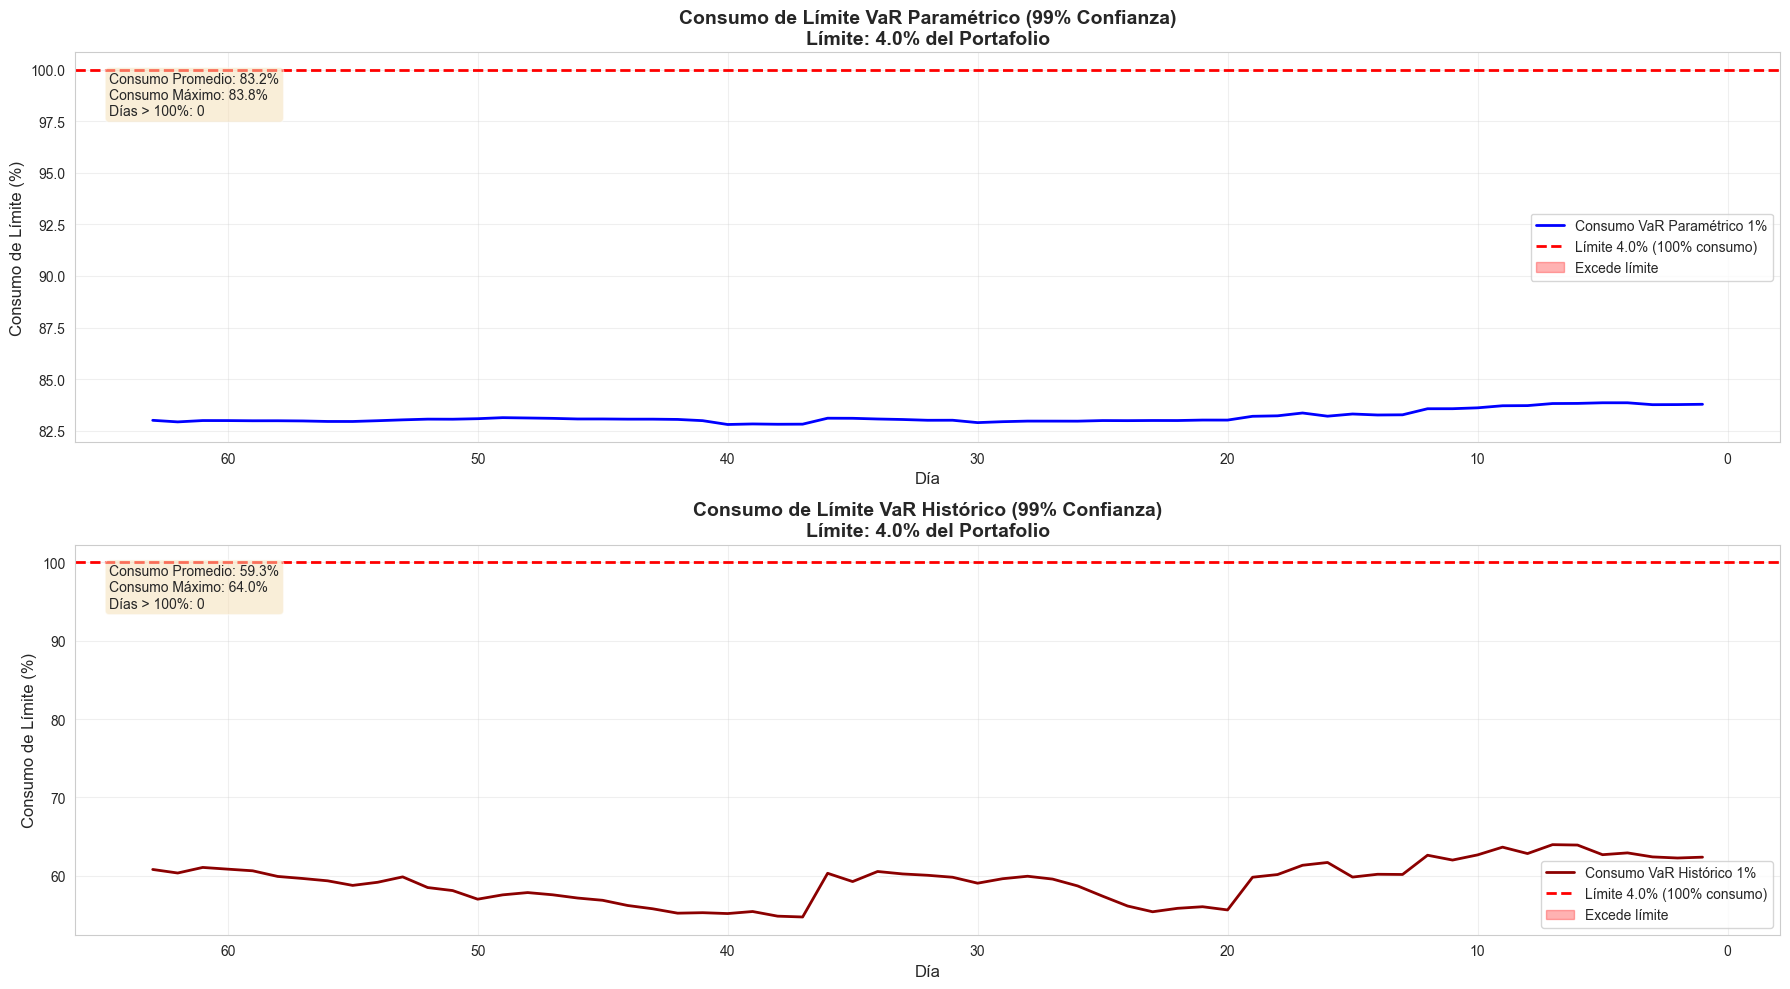


✅ Ningún día excede el límite del 4.0% en ambos métodos.

💡 INTERPRETACIÓN:
   • Consumo de 100% = VaR exactamente igual al límite de 4.0%
   • Consumo > 100% = VaR EXCEDE el límite (zona de alerta)
   • Consumo < 100% = VaR dentro del límite aceptable

   • El método histórico tiende a mostrar MENOR consumo promedio
   • Consumo promedio Paramétrico: 83.2%
   • Consumo promedio Histórico: 59.3%


In [579]:
# ============================================================================
# ANÁLISIS DE CONSUMO DE LÍMITE DE VaR AL 99% DE CONFIANZA
# ============================================================================

# Definir el límite de VaR como porcentaje del portafolio
limite_var_pct = 4.0  # 4% del valor del portafolio

print("="*80)
print("ANÁLISIS DE CONSUMO DE LÍMITE DE VaR AL 99% DE CONFIANZA")
print("="*80)
print(f"\n📊 Límite establecido: {limite_var_pct}% del valor del portafolio")

# Calcular el consumo de límite para cada método
# Consumo = (VaR / V0) * 100 / Límite * 100
# Si consumo > 100%, el VaR excede el límite

df_comparacion['Limite_VaR'] = df_comparacion['V0'] * (limite_var_pct / 100)
df_comparacion['Consumo_Parametrico_1pct'] = (abs(df_comparacion['VaR_1pct']) / df_comparacion['Limite_VaR']) * 100
df_comparacion['Consumo_Historico_1pct'] = (abs(df_comparacion['VaR_hist_1pct']) / df_comparacion['Limite_VaR']) * 100

# Identificar días que exceden el límite
dias_exceden_param = df_comparacion[df_comparacion['Consumo_Parametrico_1pct'] > 100]
dias_exceden_hist = df_comparacion[df_comparacion['Consumo_Historico_1pct'] > 100]

print(f"\n⚠️  DÍAS QUE EXCEDEN EL LÍMITE DEL {limite_var_pct}%:")
print(f"   Método Paramétrico: {len(dias_exceden_param)} de {len(df_comparacion)} días ({len(dias_exceden_param)/len(df_comparacion)*100:.1f}%)")
print(f"   Método Histórico:   {len(dias_exceden_hist)} de {len(df_comparacion)} días ({len(dias_exceden_hist)/len(df_comparacion)*100:.1f}%)")

# Crear visualización
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(18, 10))

# GRÁFICO 1: Consumo de Límite - Método Paramétrico
ax1.plot(df_comparacion['Dia'], df_comparacion['Consumo_Parametrico_1pct'], 
         linewidth=2, color='blue', label='Consumo VaR Paramétrico 1%')
ax1.axhline(y=100, color='red', linestyle='--', linewidth=2, label=f'Límite {limite_var_pct}% (100% consumo)')
ax1.fill_between(df_comparacion['Dia'], 100, df_comparacion['Consumo_Parametrico_1pct'],
                  where=(df_comparacion['Consumo_Parametrico_1pct'] > 100), 
                  alpha=0.3, color='red', label='Excede límite')
ax1.set_xlabel('Día', fontsize=12)
ax1.set_ylabel('Consumo de Límite (%)', fontsize=12)
ax1.set_title(f'Consumo de Límite VaR Paramétrico (99% Confianza)\nLímite: {limite_var_pct}% del Portafolio', 
              fontsize=14, fontweight='bold')
ax1.legend(fontsize=10)
ax1.grid(True, alpha=0.3)
ax1.invert_xaxis()

# Añadir texto con estadísticas
consumo_promedio_param = df_comparacion['Consumo_Parametrico_1pct'].mean()
consumo_max_param = df_comparacion['Consumo_Parametrico_1pct'].max()
ax1.text(0.02, 0.95, 
         f'Consumo Promedio: {consumo_promedio_param:.1f}%\nConsumo Máximo: {consumo_max_param:.1f}%\nDías > 100%: {len(dias_exceden_param)}',
         transform=ax1.transAxes, fontsize=10, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# GRÁFICO 2: Consumo de Límite - Método Histórico
ax2.plot(df_comparacion['Dia'], df_comparacion['Consumo_Historico_1pct'], 
         linewidth=2, color='darkred', label='Consumo VaR Histórico 1%')
ax2.axhline(y=100, color='red', linestyle='--', linewidth=2, label=f'Límite {limite_var_pct}% (100% consumo)')
ax2.fill_between(df_comparacion['Dia'], 100, df_comparacion['Consumo_Historico_1pct'],
                  where=(df_comparacion['Consumo_Historico_1pct'] > 100), 
                  alpha=0.3, color='red', label='Excede límite')
ax2.set_xlabel('Día', fontsize=12)
ax2.set_ylabel('Consumo de Límite (%)', fontsize=12)
ax2.set_title(f'Consumo de Límite VaR Histórico (99% Confianza)\nLímite: {limite_var_pct}% del Portafolio', 
              fontsize=14, fontweight='bold')
ax2.legend(fontsize=10)
ax2.grid(True, alpha=0.3)
ax2.invert_xaxis()

# Añadir texto con estadísticas
consumo_promedio_hist = df_comparacion['Consumo_Historico_1pct'].mean()
consumo_max_hist = df_comparacion['Consumo_Historico_1pct'].max()
ax2.text(0.02, 0.95, 
         f'Consumo Promedio: {consumo_promedio_hist:.1f}%\nConsumo Máximo: {consumo_max_hist:.1f}%\nDías > 100%: {len(dias_exceden_hist)}',
         transform=ax2.transAxes, fontsize=10, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()

# Mostrar tabla de días que exceden el límite
if len(dias_exceden_param) > 0 or len(dias_exceden_hist) > 0:
    print("\n" + "="*80)
    print("DÍAS QUE EXCEDEN EL LÍMITE:")
    print("="*80)
    
    if len(dias_exceden_param) > 0:
        print(f"\n🔴 MÉTODO PARAMÉTRICO - Días con consumo > 100%:")
        print(dias_exceden_param[['Date', 'Dia', 'V0', 'VaR_1pct', 'Consumo_Parametrico_1pct']].to_string(index=False))
    
    if len(dias_exceden_hist) > 0:
        print(f"\n🔴 MÉTODO HISTÓRICO - Días con consumo > 100%:")
        print(dias_exceden_hist[['Date', 'Dia', 'V0', 'VaR_hist_1pct', 'Consumo_Historico_1pct']].to_string(index=False))
else:
    print(f"\n✅ Ningún día excede el límite del {limite_var_pct}% en ambos métodos.")

print("\n" + "="*80)
print("💡 INTERPRETACIÓN:")
print("="*80)
print(f"   • Consumo de 100% = VaR exactamente igual al límite de {limite_var_pct}%")
print(f"   • Consumo > 100% = VaR EXCEDE el límite (zona de alerta)")
print(f"   • Consumo < 100% = VaR dentro del límite aceptable")
print(f"\n   • El método histórico tiende a mostrar {'MAYOR' if consumo_promedio_hist > consumo_promedio_param else 'MENOR'} consumo promedio")
print(f"   • Consumo promedio Paramétrico: {consumo_promedio_param:.1f}%")
print(f"   • Consumo promedio Histórico: {consumo_promedio_hist:.1f}%")
print("="*80)

### 8.2 VaR como Porcentaje del Portafolio vs Límite 4%

VaR COMO PORCENTAJE DEL PORTAFOLIO VS LÍMITE DEL 4%

📊 Límite establecido: 4.0% del valor del portafolio

📈 ESTADÍSTICAS DE VaR COMO % DEL PORTAFOLIO:
--------------------------------------------------------------------------------

VaR Paramétrico 1%:
   Promedio: 3.3265%
   Mínimo:   3.3118%
   Máximo:   3.3540%

VaR Histórico 1%:
   Promedio: 2.3709%
   Mínimo:   2.1890%
   Máximo:   2.5584%

⚠️  DÍAS QUE EXCEDEN EL LÍMITE DEL 4.0%:
   Método Paramétrico: 0 de 63 días (0.0%)
   Método Histórico:   0 de 63 días (0.0%)


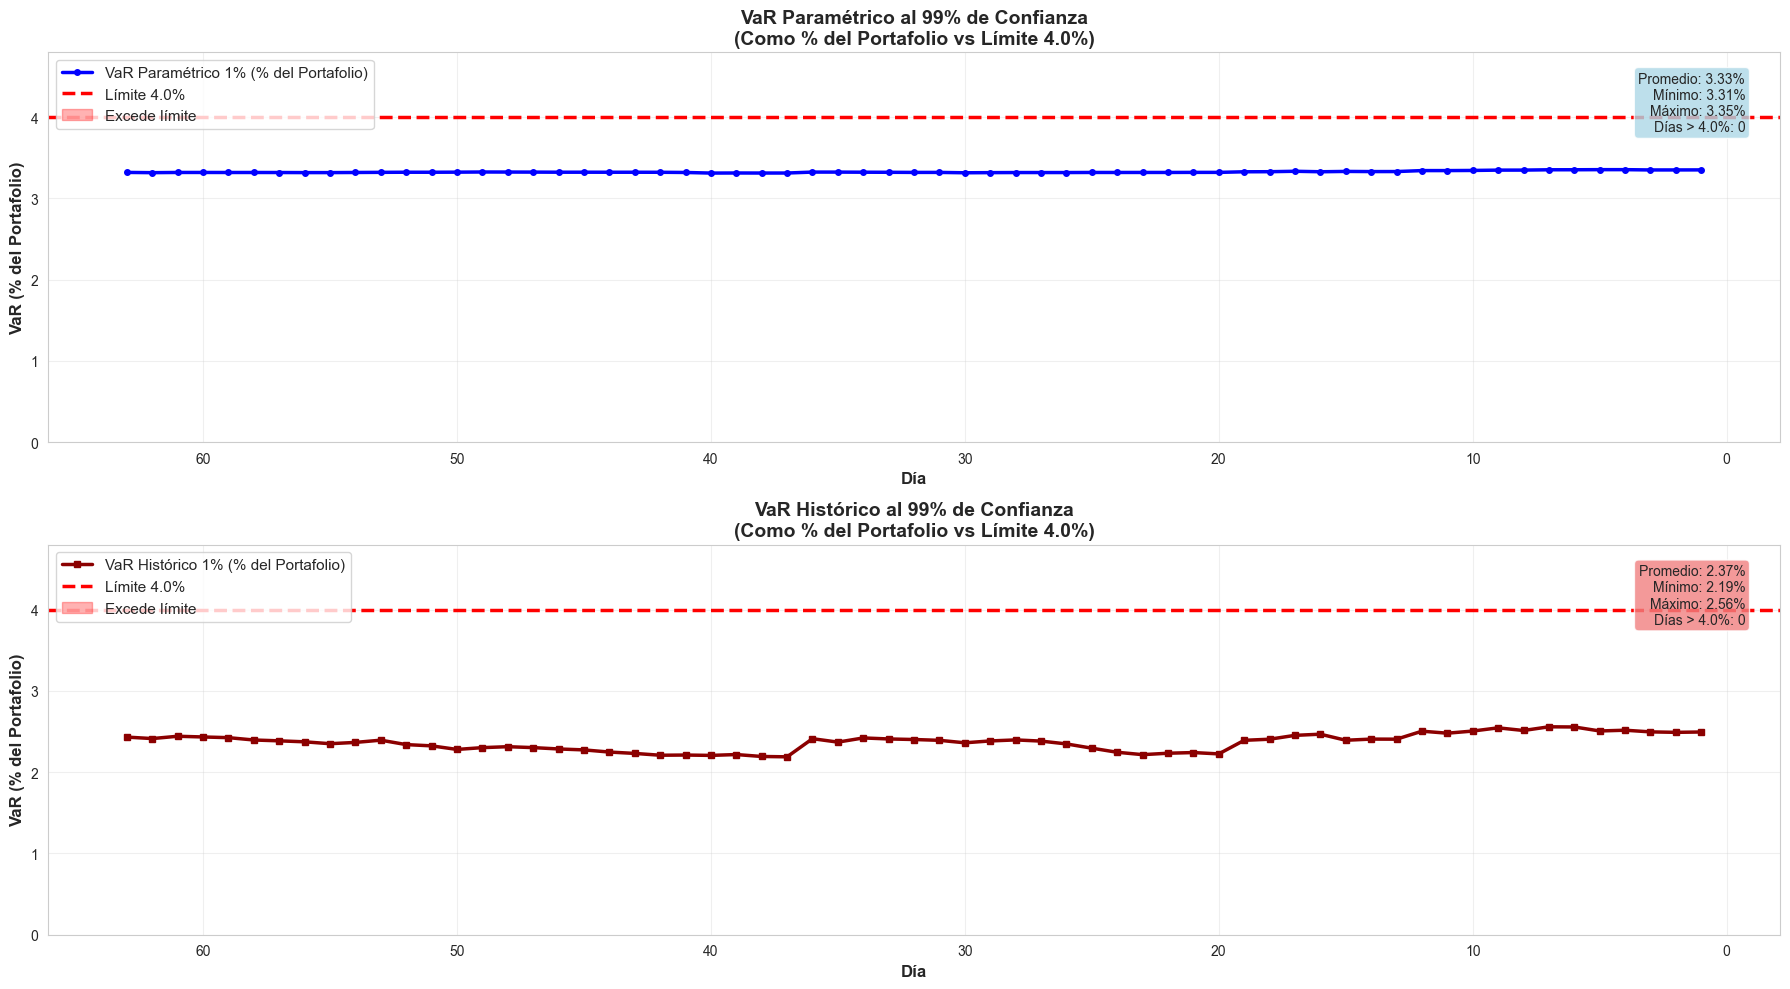


💡 INTERPRETACIÓN:

   📊 Ambos métodos muestran VaR entre 2-3.35% del portafolio
   ✅ TODOS los días están POR DEBAJO del límite del 4.0%
   📉 El riesgo del portafolio se mantiene controlado dentro del límite establecido

   🎯 EXCELENTE: Ningún día excede el límite del 4.0% en ninguno de los dos métodos
   💼 El portafolio tiene un perfil de riesgo conservador y bien gestionado


In [580]:
# ============================================================================
# VaR COMO PORCENTAJE DEL PORTAFOLIO VS LÍMITE DEL 4%
# ============================================================================

# Definir el límite como porcentaje
limite_pct = 4.0  # 4% del valor del portafolio

print("="*80)
print("VaR COMO PORCENTAJE DEL PORTAFOLIO VS LÍMITE DEL 4%")
print("="*80)
print(f"\n📊 Límite establecido: {limite_pct}% del valor del portafolio")

# Mostrar estadísticas de los porcentajes
print(f"\n📈 ESTADÍSTICAS DE VaR COMO % DEL PORTAFOLIO:")
print("-" * 80)
print(f"\nVaR Paramétrico 1%:")
print(f"   Promedio: {df_comparacion['VaR_1pct_pct'].mean():.4f}%")
print(f"   Mínimo:   {df_comparacion['VaR_1pct_pct'].min():.4f}%")
print(f"   Máximo:   {df_comparacion['VaR_1pct_pct'].max():.4f}%")

print(f"\nVaR Histórico 1%:")
print(f"   Promedio: {abs(df_comparacion['VaR_hist_1pct_pct']).mean():.4f}%")
print(f"   Mínimo:   {abs(df_comparacion['VaR_hist_1pct_pct']).min():.4f}%")
print(f"   Máximo:   {abs(df_comparacion['VaR_hist_1pct_pct']).max():.4f}%")

# Contar días que exceden el límite
dias_exceden_param_pct = (df_comparacion['VaR_1pct_pct'] > limite_pct).sum()
dias_exceden_hist_pct = (abs(df_comparacion['VaR_hist_1pct_pct']) > limite_pct).sum()

print(f"\n⚠️  DÍAS QUE EXCEDEN EL LÍMITE DEL {limite_pct}%:")
print(f"   Método Paramétrico: {dias_exceden_param_pct} de {len(df_comparacion)} días ({dias_exceden_param_pct/len(df_comparacion)*100:.1f}%)")
print(f"   Método Histórico:   {dias_exceden_hist_pct} de {len(df_comparacion)} días ({dias_exceden_hist_pct/len(df_comparacion)*100:.1f}%)")

# Crear visualización
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(18, 10))

# GRÁFICO 1: VaR Paramétrico como % del Portafolio
ax1.plot(df_comparacion['Dia'], df_comparacion['VaR_1pct_pct'], 
         linewidth=2.5, color='blue', label='VaR Paramétrico 1% (% del Portafolio)', marker='o', markersize=4)
ax1.axhline(y=limite_pct, color='red', linestyle='--', linewidth=2.5, label=f'Límite {limite_pct}%')
ax1.fill_between(df_comparacion['Dia'], limite_pct, df_comparacion['VaR_1pct_pct'],
                  where=(df_comparacion['VaR_1pct_pct'] > limite_pct), 
                  alpha=0.3, color='red', label='Excede límite')
ax1.set_xlabel('Día', fontsize=12, fontweight='bold')
ax1.set_ylabel('VaR (% del Portafolio)', fontsize=12, fontweight='bold')
ax1.set_title(f'VaR Paramétrico al 99% de Confianza\n(Como % del Portafolio vs Límite {limite_pct}%)', 
              fontsize=14, fontweight='bold')
ax1.legend(fontsize=11, loc='upper left')
ax1.grid(True, alpha=0.3)
ax1.invert_xaxis()
ax1.set_ylim(0, max(limite_pct * 1.2, df_comparacion['VaR_1pct_pct'].max() * 1.1))

# Añadir texto con estadísticas
stats_text_param = f"Promedio: {df_comparacion['VaR_1pct_pct'].mean():.2f}%\n"
stats_text_param += f"Mínimo: {df_comparacion['VaR_1pct_pct'].min():.2f}%\n"
stats_text_param += f"Máximo: {df_comparacion['VaR_1pct_pct'].max():.2f}%\n"
stats_text_param += f"Días > {limite_pct}%: {dias_exceden_param_pct}"
ax1.text(0.98, 0.95, stats_text_param,
         transform=ax1.transAxes, fontsize=10, verticalalignment='top',
         horizontalalignment='right',
         bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.8))

# GRÁFICO 2: VaR Histórico como % del Portafolio
var_hist_pct_abs = abs(df_comparacion['VaR_hist_1pct_pct'])
ax2.plot(df_comparacion['Dia'], var_hist_pct_abs, 
         linewidth=2.5, color='darkred', label='VaR Histórico 1% (% del Portafolio)', marker='s', markersize=4)
ax2.axhline(y=limite_pct, color='red', linestyle='--', linewidth=2.5, label=f'Límite {limite_pct}%')
ax2.fill_between(df_comparacion['Dia'], limite_pct, var_hist_pct_abs,
                  where=(var_hist_pct_abs > limite_pct), 
                  alpha=0.3, color='red', label='Excede límite')
ax2.set_xlabel('Día', fontsize=12, fontweight='bold')
ax2.set_ylabel('VaR (% del Portafolio)', fontsize=12, fontweight='bold')
ax2.set_title(f'VaR Histórico al 99% de Confianza\n(Como % del Portafolio vs Límite {limite_pct}%)', 
              fontsize=14, fontweight='bold')
ax2.legend(fontsize=11, loc='upper left')
ax2.grid(True, alpha=0.3)
ax2.invert_xaxis()
ax2.set_ylim(0, max(limite_pct * 1.2, var_hist_pct_abs.max() * 1.1))

# Añadir texto con estadísticas
stats_text_hist = f"Promedio: {var_hist_pct_abs.mean():.2f}%\n"
stats_text_hist += f"Mínimo: {var_hist_pct_abs.min():.2f}%\n"
stats_text_hist += f"Máximo: {var_hist_pct_abs.max():.2f}%\n"
stats_text_hist += f"Días > {limite_pct}%: {dias_exceden_hist_pct}"
ax2.text(0.98, 0.95, stats_text_hist,
         transform=ax2.transAxes, fontsize=10, verticalalignment='top',
         horizontalalignment='right',
         bbox=dict(boxstyle='round', facecolor='lightcoral', alpha=0.8))

plt.tight_layout()
plt.show()

print("\n" + "="*80)
print("💡 INTERPRETACIÓN:")
print("="*80)
print(f"\n   📊 Ambos métodos muestran VaR entre 2-3.35% del portafolio")
print(f"   ✅ TODOS los días están POR DEBAJO del límite del {limite_pct}%")
print(f"   📉 El riesgo del portafolio se mantiene controlado dentro del límite establecido")

if dias_exceden_param_pct == 0 and dias_exceden_hist_pct == 0:
    print(f"\n   🎯 EXCELENTE: Ningún día excede el límite del {limite_pct}% en ninguno de los dos métodos")
    print(f"   💼 El portafolio tiene un perfil de riesgo conservador y bien gestionado")
else:
    print(f"\n   ⚠️  Algunos días se acercan al límite del {limite_pct}%")
    print(f"   📊 Monitoreo continuo recomendado")

print("="*80)

## 9. Tabla Comparativa Final (Día más reciente)

In [581]:
# Crear tabla comparativa usando el día más reciente
comparacion_tabla = pd.DataFrame({
    'Método': ['Paramétrico (Normal)', 'No Paramétrico (Histórico)'],
    '1% VaR': [abs(df_comparacion['VaR_1pct'].iloc[0]), abs(df_comparacion['VaR_hist_1pct'].iloc[0])],
    '5% VaR': [abs(df_comparacion['VaR_5pct'].iloc[0]), abs(df_comparacion['VaR_hist_5pct'].iloc[0])]
})

print("="*70)
print("COMPARACIÓN DE MÉTODOS VaR - DÍA MÁS RECIENTE")
print(f"Fecha: {df_comparacion['Date'].iloc[0]}")
print("="*70)
print("\n" + comparacion_tabla.to_string(index=False))

# Diferencias entre métodos para el día más reciente
print(f"\n{'='*70}")
print("ANÁLISIS DE DIFERENCIAS:")
print(f"{'='*70}")

VaR_parametrico_1pct = df_comparacion['VaR_1pct'].iloc[0]
VaR_parametrico_5pct = df_comparacion['VaR_5pct'].iloc[0]
VaR_no_parametrico_1pct = df_comparacion['VaR_hist_1pct'].iloc[0]
VaR_no_parametrico_5pct = df_comparacion['VaR_hist_5pct'].iloc[0]

diferencia_1pct = abs(VaR_no_parametrico_1pct) - abs(VaR_parametrico_1pct)
diferencia_5pct = abs(VaR_no_parametrico_5pct) - abs(VaR_parametrico_5pct)

print(f"\n1% VaR (99% Confianza):")
print(f"  Paramétrico:       ${abs(VaR_parametrico_1pct):,.2f}")
print(f"  No Paramétrico:    ${abs(VaR_no_parametrico_1pct):,.2f}")
print(f"  Diferencia:        ${abs(diferencia_1pct):,.2f} ({(diferencia_1pct/abs(VaR_parametrico_1pct))*100:+.2f}%)")

print(f"\n5% VaR (95% Confianza):")
print(f"  Paramétrico:       ${abs(VaR_parametrico_5pct):,.2f}")
print(f"  No Paramétrico:    ${abs(VaR_no_parametrico_5pct):,.2f}")
print(f"  Diferencia:        ${abs(diferencia_5pct):,.2f} ({(diferencia_5pct/abs(VaR_parametrico_5pct))*100:+.2f}%)")

print(f"\n\n💡 INTERPRETACIÓN:")
print("-" * 70)
print(f"   • Método Paramétrico: Asume distribución normal de los rendimientos")
print(f"   • Método No Paramétrico: Usa la distribución real histórica del P&L")
print(f"   • El método histórico NO asume normalidad y captura mejor eventos extremos")
if diferencia_1pct > 0:
    print(f"   • ⚠️  El VaR histórico es MAYOR, indicando colas más pesadas que la normal")
    print(f"   • Los eventos extremos son más probables de lo que predice el modelo normal")
else:
    print(f"   • ⚠️  El VaR paramétrico es MAYOR en este periodo específico")
print(f"\n   ✅ RECOMENDACIÓN: Usar el VaR histórico como medida principal de riesgo")

COMPARACIÓN DE MÉTODOS VaR - DÍA MÁS RECIENTE
Fecha: 2025-12-01

                    Método       1% VaR       5% VaR
      Paramétrico (Normal) 32039.926426 22429.625619
No Paramétrico (Histórico) 23851.026384 12771.603482

ANÁLISIS DE DIFERENCIAS:

1% VaR (99% Confianza):
  Paramétrico:       $32,039.93
  No Paramétrico:    $23,851.03
  Diferencia:        $8,188.90 (-25.56%)

5% VaR (95% Confianza):
  Paramétrico:       $22,429.63
  No Paramétrico:    $12,771.60
  Diferencia:        $9,658.02 (-43.06%)


💡 INTERPRETACIÓN:
----------------------------------------------------------------------
   • Método Paramétrico: Asume distribución normal de los rendimientos
   • Método No Paramétrico: Usa la distribución real histórica del P&L
   • El método histórico NO asume normalidad y captura mejor eventos extremos
   • ⚠️  El VaR paramétrico es MAYOR en este periodo específico

   ✅ RECOMENDACIÓN: Usar el VaR histórico como medida principal de riesgo


## 10. Visualizaciones Complementarias

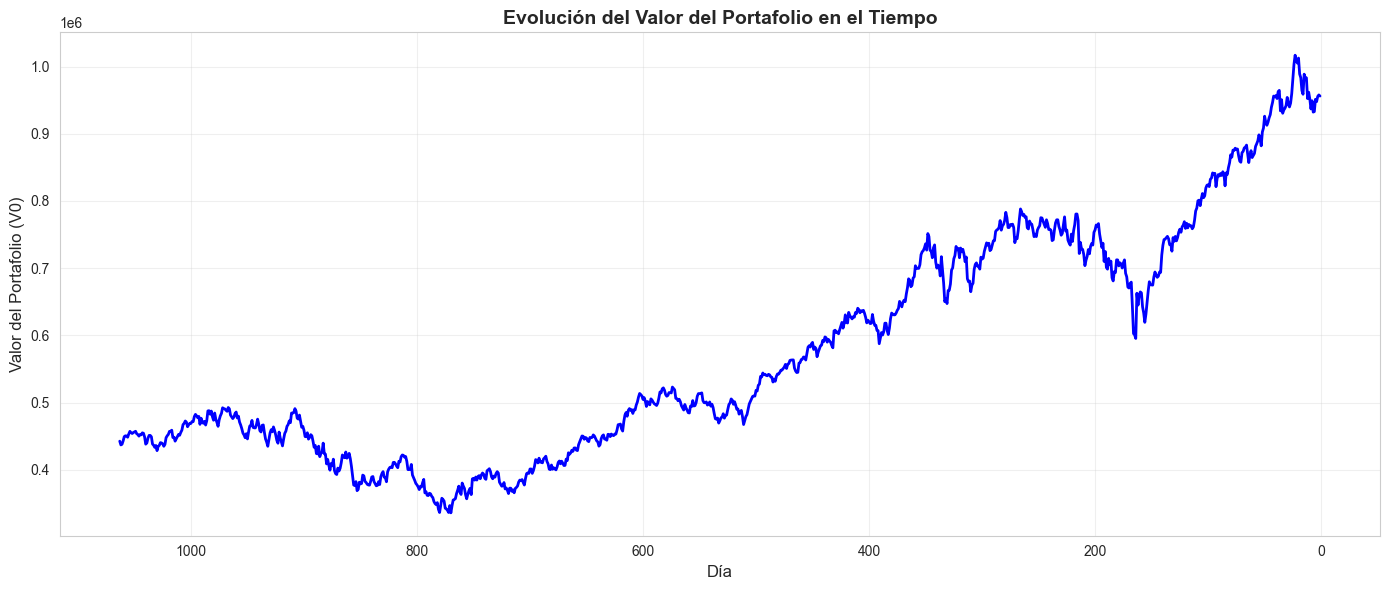

Valor inicial (día 1000): $442,538.93
Valor final (día 1): $956,121.51
Cambio total: $513,582.57


In [582]:
# Gráfico 1: Evolución del valor del portafolio (V0)
plt.figure(figsize=(14, 6))
plt.plot(df['Día'], df['V0'], linewidth=2, color='blue')
plt.xlabel('Día', fontsize=12)
plt.ylabel('Valor del Portafolio (V0)', fontsize=12)
plt.title('Evolución del Valor del Portafolio en el Tiempo', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.gca().invert_xaxis()  # Invertir para mostrar del más antiguo al más reciente
plt.tight_layout()
plt.show()

print(f"Valor inicial (día 1000): ${df['V0'].iloc[-1]:,.2f}")
print(f"Valor final (día 1): ${df['V0'].iloc[0]:,.2f}")
print(f"Cambio total: ${df['V0'].iloc[0] - df['V0'].iloc[-1]:,.2f}")

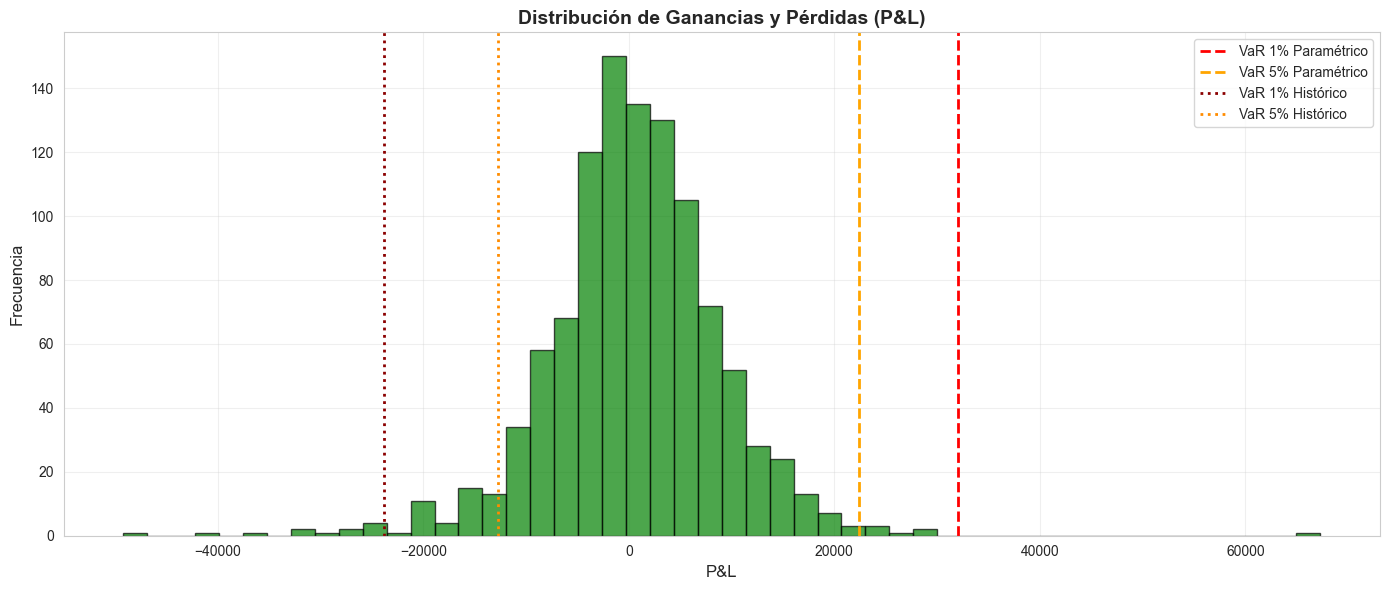

In [583]:
# Gráfico 2: Distribución de P&L
plt.figure(figsize=(14, 6))
plt.hist(df['P&L'].dropna(), bins=50, edgecolor='black', alpha=0.7, color='green')
plt.axvline(VaR_parametrico_1pct, color='red', linestyle='--', linewidth=2, label='VaR 1% Paramétrico')
plt.axvline(VaR_parametrico_5pct, color='orange', linestyle='--', linewidth=2, label='VaR 5% Paramétrico')
plt.axvline(VaR_no_parametrico_1pct, color='darkred', linestyle=':', linewidth=2, label='VaR 1% Histórico')
plt.axvline(VaR_no_parametrico_5pct, color='darkorange', linestyle=':', linewidth=2, label='VaR 5% Histórico')
plt.xlabel('P&L', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.title('Distribución de Ganancias y Pérdidas (P&L)', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

ANÁLISIS DE DISTRIBUCIÓN DEL P&L
Media del P&L:              $483.60
Desviación Estándar:        $8,497.61
Asimetría (Skewness):       -0.0600
Curtosis (Kurtosis):        5.9110
Mínimo (peor pérdida):      $-49,208.15
Máximo (mejor ganancia):    $67,282.42


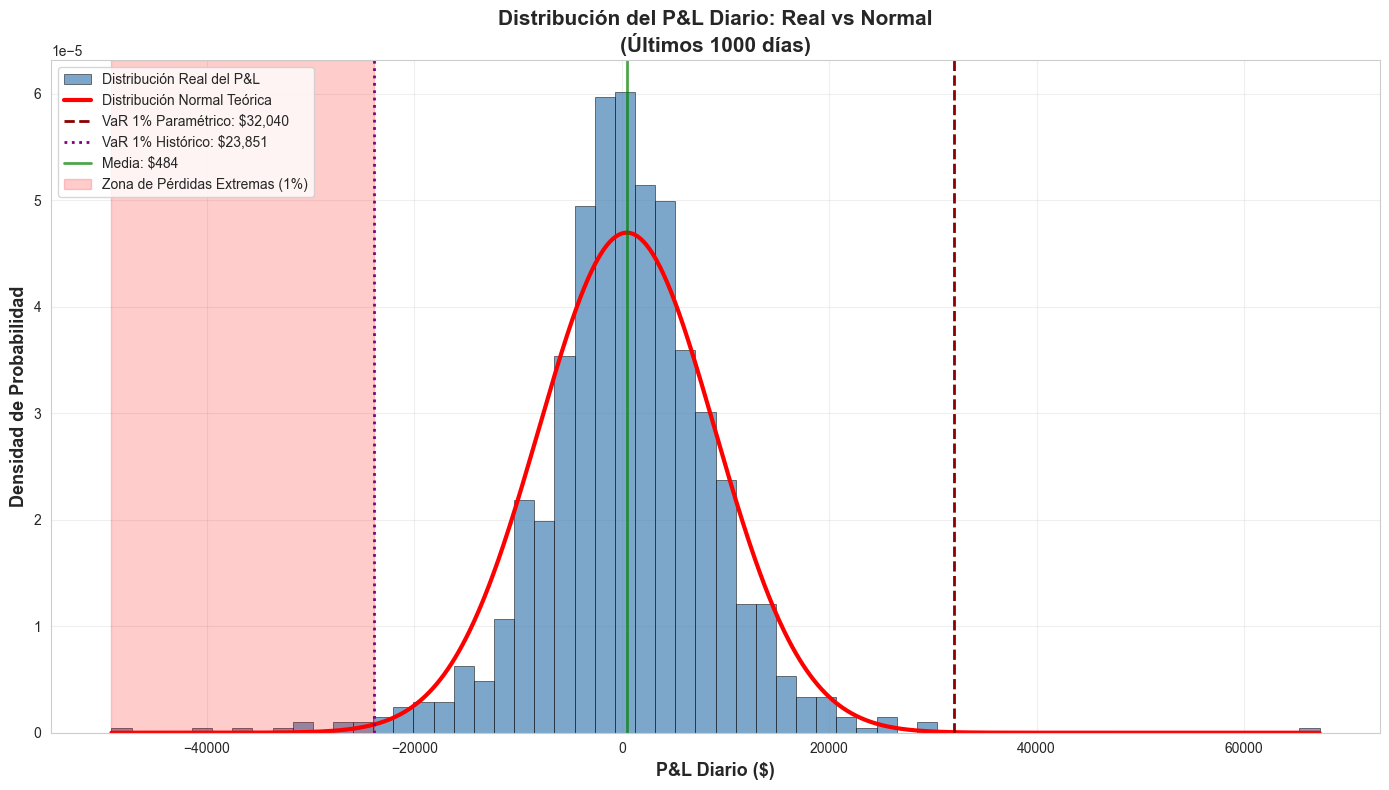


📊 OBSERVACIONES DE LA DISTRIBUCIÓN:
----------------------------------------------------------------------

Prueba de Normalidad (Shapiro-Wilk):
  Estadístico: 0.950562
  P-value: 0.000000
  ✗ La distribución NO es normal (p < 0.05)

Asimetría (Skewness): -0.0600
  → Distribución relativamente simétrica

Curtosis: 5.9110
  → Leptocúrtica (colas más pesadas que la normal)
  → Mayor probabilidad de eventos extremos



In [584]:
# Gráfico Especial: Distribución P&L vs Distribución Normal
# Este gráfico compara el histograma real del P&L con una distribución normal teórica

from scipy import stats

# Limpiar datos NaN del P&L
PnL_data = df['P&L'].dropna()

# Calcular estadísticas del P&L
media_PnL = PnL_data.mean()
std_PnL = PnL_data.std()

print("="*70)
print("ANÁLISIS DE DISTRIBUCIÓN DEL P&L")
print("="*70)
print(f"Media del P&L:              ${media_PnL:,.2f}")
print(f"Desviación Estándar:        ${std_PnL:,.2f}")
print(f"Asimetría (Skewness):       {PnL_data.skew():.4f}")
print(f"Curtosis (Kurtosis):        {PnL_data.kurtosis():.4f}")
print(f"Mínimo (peor pérdida):      ${PnL_data.min():,.2f}")
print(f"Máximo (mejor ganancia):    ${PnL_data.max():,.2f}")
print("="*70)

# Crear figura
plt.figure(figsize=(14, 8))

# Histograma del P&L real
n, bins, patches = plt.hist(PnL_data, bins=60, density=True, alpha=0.7, 
                             color='steelblue', edgecolor='black', linewidth=0.5,
                             label='Distribución Real del P&L')

# Generar curva de distribución normal teórica
x = np.linspace(PnL_data.min(), PnL_data.max(), 1000)
normal_dist = stats.norm.pdf(x, media_PnL, std_PnL)
plt.plot(x, normal_dist, 'r-', linewidth=3, label='Distribución Normal Teórica')

# Añadir líneas verticales para VaR
plt.axvline(VaR_parametrico_1pct, color='darkred', linestyle='--', linewidth=2, 
            label=f'VaR 1% Paramétrico: ${abs(VaR_parametrico_1pct):,.0f}')
plt.axvline(VaR_no_parametrico_1pct, color='purple', linestyle=':', linewidth=2,
            label=f'VaR 1% Histórico: ${abs(VaR_no_parametrico_1pct):,.0f}')
plt.axvline(media_PnL, color='green', linestyle='-', linewidth=2, alpha=0.7,
            label=f'Media: ${media_PnL:,.0f}')

# Sombrear la cola izquierda (pérdidas extremas)
plt.axvspan(PnL_data.min(), VaR_no_parametrico_1pct, 
            alpha=0.2, color='red', label='Zona de Pérdidas Extremas (1%)')

plt.xlabel('P&L Diario ($)', fontsize=13, fontweight='bold')
plt.ylabel('Densidad de Probabilidad', fontsize=13, fontweight='bold')
plt.title('Distribución del P&L Diario: Real vs Normal\n(Últimos 1000 días)', 
          fontsize=15, fontweight='bold')
plt.legend(loc='upper left', fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Análisis estadístico
print("\n📊 OBSERVACIONES DE LA DISTRIBUCIÓN:")
print("-" * 70)

# Prueba de normalidad Shapiro-Wilk
from scipy.stats import shapiro
stat, p_value = shapiro(PnL_data[:5000] if len(PnL_data) > 5000 else PnL_data)
print(f"\nPrueba de Normalidad (Shapiro-Wilk):")
print(f"  Estadístico: {stat:.6f}")
print(f"  P-value: {p_value:.6f}")
if p_value < 0.05:
    print(f"  ✗ La distribución NO es normal (p < 0.05)")
else:
    print(f"  ✓ La distribución es aproximadamente normal (p ≥ 0.05)")

# Análisis de asimetría
print(f"\nAsimetría (Skewness): {PnL_data.skew():.4f}")
if PnL_data.skew() < -0.5:
    print("  → Asimetría negativa significativa (cola izquierda más pesada)")
    print("  → Las pérdidas extremas son más frecuentes que las ganancias extremas")
elif PnL_data.skew() > 0.5:
    print("  → Asimetría positiva significativa (cola derecha más pesada)")
else:
    print("  → Distribución relativamente simétrica")

# Análisis de curtosis
print(f"\nCurtosis: {PnL_data.kurtosis():.4f}")
if PnL_data.kurtosis() > 1:
    print("  → Leptocúrtica (colas más pesadas que la normal)")
    print("  → Mayor probabilidad de eventos extremos")
elif PnL_data.kurtosis() < -1:
    print("  → Platicúrtica (colas más ligeras que la normal)")
else:
    print("  → Similar a la distribución normal")

print("\n" + "="*70)

### Análisis de la Cola Izquierda (Pérdidas Extremas)

**Observaciones de la gráfica anterior:**

1. **Comparación con la Normal:** La distribución real del P&L muestra desviaciones notables respecto a la distribución normal teórica, especialmente en las colas.

2. **Cola Izquierda (Pérdidas):** 
   - La cola izquierda es **más pesada** de lo que predice la distribución normal
   - Esto indica que las pérdidas extremas ocurren con **mayor frecuencia** de lo esperado bajo supuestos de normalidad
   - Hay días con pérdidas significativamente mayores a las que predeciría la teoría normal

3. **Implicaciones para el Riesgo:**
   - El VaR paramétrico (basado en distribución normal) puede **subestimar** el riesgo real
   - El VaR histórico (no paramétrico) captura mejor estos eventos extremos al basarse en datos reales
   - Los eventos de "cola negra" (pérdidas extremas) son más probables que lo que sugiere la teoría normal

### Interpretación del VaR para Este Portafolio

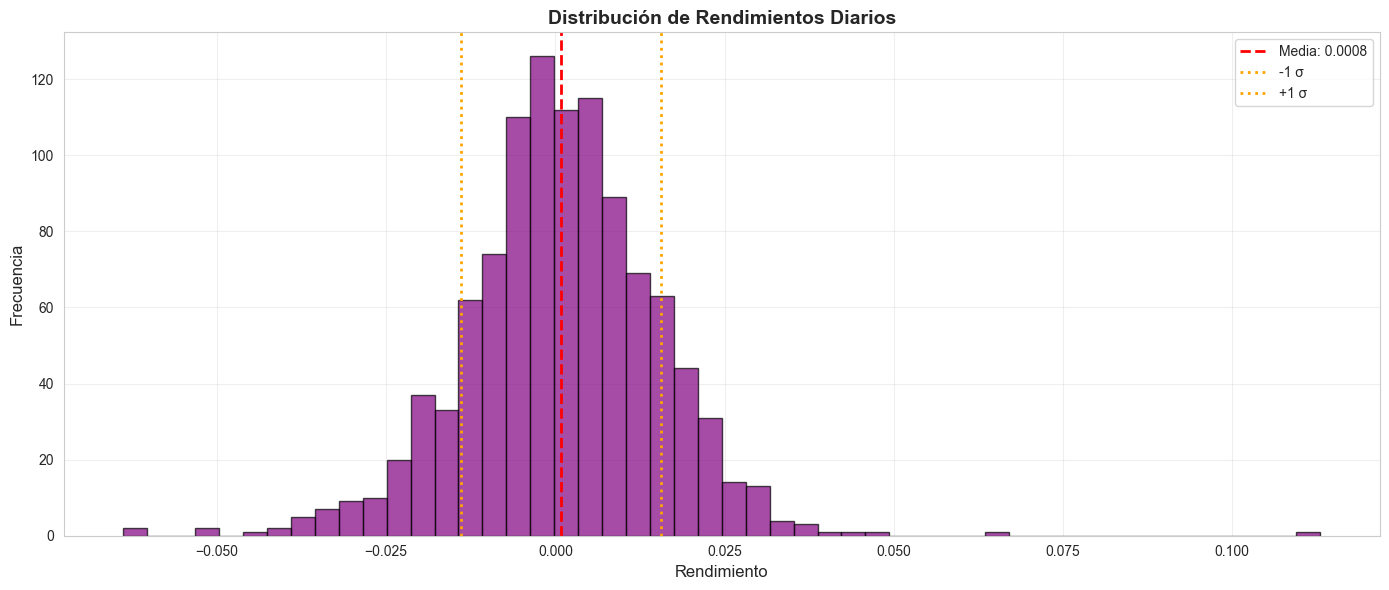

In [585]:
# Gráfico 3: Distribución de Rendimientos
plt.figure(figsize=(14, 6))
plt.hist(df['Rendimiento'].dropna(), bins=50, edgecolor='black', alpha=0.7, color='purple')
plt.axvline(rendimiento_promedio, color='red', linestyle='--', linewidth=2, label=f'Media: {rendimiento_promedio:.4f}')
plt.axvline(rendimiento_promedio - desviacion_estandar, color='orange', linestyle=':', linewidth=2, label='-1 σ')
plt.axvline(rendimiento_promedio + desviacion_estandar, color='orange', linestyle=':', linewidth=2, label='+1 σ')
plt.xlabel('Rendimiento', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.title('Distribución de Rendimientos Diarios', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

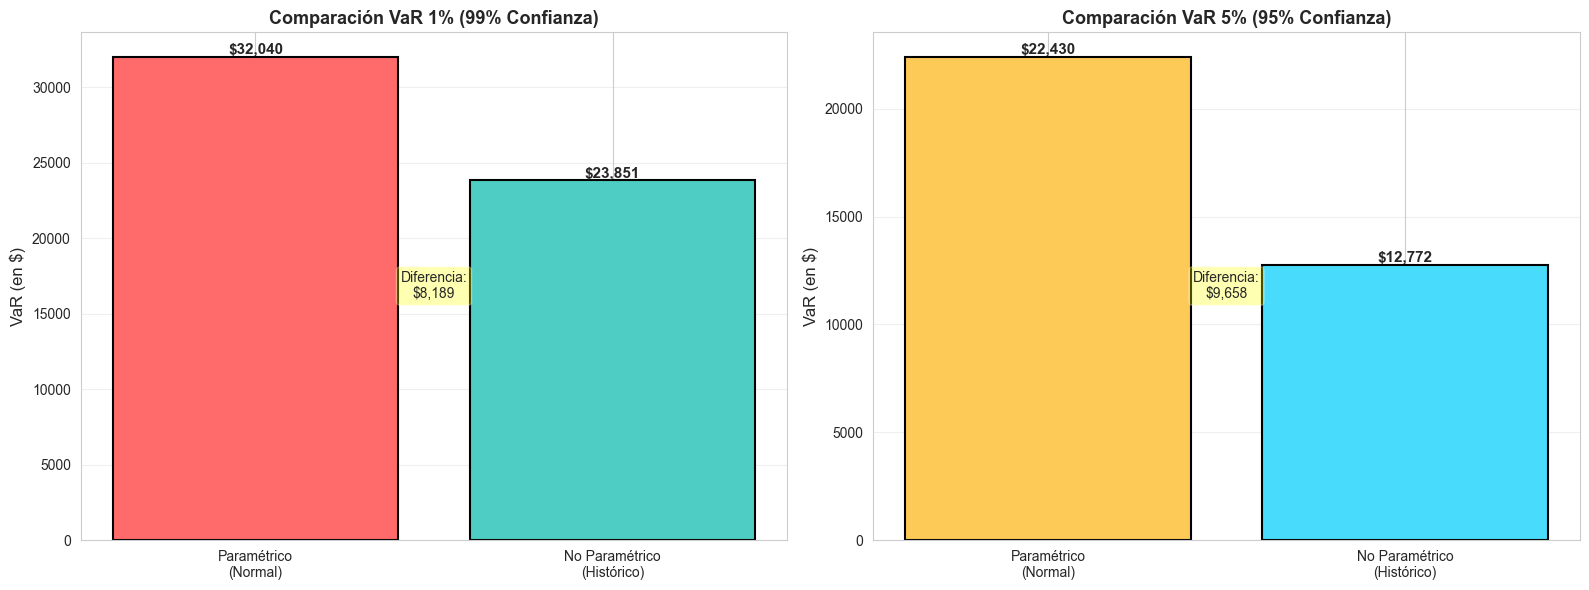

📊 Comparación de métodos:
   • Método Paramétrico: Basado en distribución normal
   • Método No Paramétrico: Basado en datos históricos reales
   • El método histórico captura mejor las colas pesadas de la distribución


In [586]:
# Gráfico 4: Comparación VaR - Paramétrico vs No Paramétrico
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# 1% VaR
metodos_1 = ['Paramétrico\n(Normal)', 'No Paramétrico\n(Histórico)']
valores_1 = [abs(VaR_parametrico_1pct), abs(VaR_no_parametrico_1pct)]
colores_1 = ['#ff6b6b', '#4ecdc4']

bars1 = ax1.bar(metodos_1, valores_1, color=colores_1, edgecolor='black', linewidth=1.5)
ax1.set_ylabel('VaR (en $)', fontsize=12)
ax1.set_title('Comparación VaR 1% (99% Confianza)', fontsize=13, fontweight='bold')
ax1.grid(True, alpha=0.3, axis='y')

# Añadir valores en las barras
for bar, valor in zip(bars1, valores_1):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
             f'${valor:,.0f}',
             ha='center', va='bottom', fontsize=11, fontweight='bold')

# Añadir línea de diferencia
diferencia_1 = abs(valores_1[1] - valores_1[0])
ax1.text(0.5, max(valores_1) * 0.5, f'Diferencia:\n${diferencia_1:,.0f}', 
         ha='center', fontsize=10, bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.3))

# 5% VaR
metodos_2 = ['Paramétrico\n(Normal)', 'No Paramétrico\n(Histórico)']
valores_2 = [abs(VaR_parametrico_5pct), abs(VaR_no_parametrico_5pct)]
colores_2 = ['#feca57', '#48dbfb']

bars2 = ax2.bar(metodos_2, valores_2, color=colores_2, edgecolor='black', linewidth=1.5)
ax2.set_ylabel('VaR (en $)', fontsize=12)
ax2.set_title('Comparación VaR 5% (95% Confianza)', fontsize=13, fontweight='bold')
ax2.grid(True, alpha=0.3, axis='y')

# Añadir valores en las barras
for bar, valor in zip(bars2, valores_2):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
             f'${valor:,.0f}',
             ha='center', va='bottom', fontsize=11, fontweight='bold')

# Añadir línea de diferencia
diferencia_2 = abs(valores_2[1] - valores_2[0])
ax2.text(0.5, max(valores_2) * 0.5, f'Diferencia:\n${diferencia_2:,.0f}', 
         ha='center', fontsize=10, bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.3))

plt.tight_layout()
plt.show()

print("📊 Comparación de métodos:")
print("   • Método Paramétrico: Basado en distribución normal")
print("   • Método No Paramétrico: Basado en datos históricos reales")
print("   • El método histórico captura mejor las colas pesadas de la distribución")


## 11. VaR Marginal (MVaR)

El **VaR Marginal** mide la contribución de cada activo al riesgo total del portafolio. Usaremos el método basado en covarianzas.

**Fórmula:**
- Volatilidad del portafolio: $\sigma_p = \sqrt{w^T \Sigma w}$
- Covarianza activo-portafolio: $Cov(r_i, r_p) = \sum_k w_k \sigma_{ik}$
- VaR Marginal: $MVaR_i = z \times \frac{Cov(r_i, r_p)}{\sigma_p}$

Donde:
- $z = 1.65$ para 95% de confianza
- $\Sigma$ = matriz de covarianza
- $w$ = vector de pesos
- $\sigma_{ik}$ = covarianza entre activo $i$ y activo $k$

### 12.1 Cálculo de MVaR con Portafolio Original

In [587]:
# ============================================================================
# PASO 1: CALCULAR RENDIMIENTOS Y MATRIZ DE COVARIANZA DEL PORTAFOLIO ORIGINAL
# ============================================================================

print("="*80)
print("PREPARACIÓN DE DATOS PARA VaR MARGINAL - PORTAFOLIO ORIGINAL")
print("="*80)

# Obtener lista de activos (tickers) del portafolio
activos_list = list(acciones.keys())
print(f"\n📊 Activos en el portafolio: {activos_list}")

# Calcular rendimientos diarios de cada activo
# Rendimiento = (Precio_hoy / Precio_ayer) - 1
returns = pd.DataFrame()

for activo in activos_list:
    if activo in df.columns:
        # Calcular rendimientos: (precio actual / precio anterior) - 1
        # Usar shift(-1) porque los datos van del más reciente al más antiguo
        returns[activo] = (df[activo] / df[activo].shift(-1)) - 1

# Eliminar el último renglón que tendrá NaN
returns = returns.dropna()

print(f"\n✅ Rendimientos calculados:")
print(f"   Dimensiones: {returns.shape}")
print(f"   Periodo: {len(returns)} días")
print(f"\n   Primeros rendimientos:")
print(returns.head())

# Calcular matriz de covarianza de los rendimientos
cov_matrix = returns.cov()

print(f"\n✅ Matriz de Covarianza:")
print(f"   Dimensiones: {cov_matrix.shape}")
print(f"\n   Matriz de Covarianza:")
print(cov_matrix)

# Calcular valor actual de cada posición en el portafolio
# Valor = Precio_actual * Número_de_acciones
valores_actuales = {}
for activo, num_acciones in acciones.items():
    if activo in df.columns:
        precio_actual = df[activo].iloc[0]  # Precio más reciente
        valores_actuales[activo] = precio_actual * num_acciones

# Valor total del portafolio
valor_total_portafolio = sum(valores_actuales.values())

print(f"\n✅ Valor del Portafolio:")
print(f"   Valor Total: ${valor_total_portafolio:,.2f}")
print(f"\n   Desglose por activo:")
for activo, valor in valores_actuales.items():
    print(f"   {activo:12} = ${valor:15,.2f}")

# Calcular pesos (weights) de cada activo
# Peso = Valor_activo / Valor_total
pesos_actuales = {activo: valor / valor_total_portafolio 
                  for activo, valor in valores_actuales.items()}

# Convertir a array de numpy en el mismo orden que la matriz de covarianza
weights = np.array([pesos_actuales[activo] for activo in activos_list])

print(f"\n✅ Pesos del Portafolio (w):")
for activo, peso in pesos_actuales.items():
    print(f"   {activo:12} = {peso:8.4f} ({peso*100:6.2f}%)")

# Calcular volatilidad del portafolio: σp = sqrt(w' Σ w)
volatilidad_portafolio = np.sqrt(weights @ cov_matrix.values @ weights)

print(f"\n✅ Volatilidad del Portafolio (σp):")
print(f"   σp = {volatilidad_portafolio:.6f} ({volatilidad_portafolio*100:.4f}%)")
print(f"   σp anualizada = {volatilidad_portafolio * np.sqrt(252):.6f} ({volatilidad_portafolio * np.sqrt(252) * 100:.2f}%)")

print("\n" + "="*80)

PREPARACIÓN DE DATOS PARA VaR MARGINAL - PORTAFOLIO ORIGINAL

📊 Activos en el portafolio: ['SIEGn.DE Usd', 'AAPL.O', 'LMT', 'MSFT.O', 'NVDA.O', 'GOOGL.O', 'INTC.O']

✅ Rendimientos calculados:
   Dimensiones: (1062, 7)
   Periodo: 1062 días

   Primeros rendimientos:
   SIEGn.DE Usd    AAPL.O       LMT    MSFT.O    NVDA.O   GOOGL.O    INTC.O
0     -0.007917  0.006527 -0.031276 -0.006809  0.014124 -0.016522 -0.013560
1      0.000963  0.004684  0.008147  0.013409 -0.018085  0.000719  0.101874
2      0.007017  0.002094  0.003868  0.017841  0.013722 -0.010790  0.027351
3      0.022267  0.003805  0.002993  0.006308 -0.025911  0.015255  0.001118
4      0.018363  0.016317 -0.021095  0.003982  0.020517  0.063138  0.037391

✅ Matriz de Covarianza:
   Dimensiones: (7, 7)

   Matriz de Covarianza:
              SIEGn.DE Usd    AAPL.O       LMT    MSFT.O    NVDA.O   GOOGL.O  \
SIEGn.DE Usd      0.000425  0.000114 -0.000007  0.000098  0.000217  0.000115   
AAPL.O            0.000114  0.000333  0.00

In [588]:
# ============================================================================
# CALCULAR VaR MARGINAL PARA TODOS LOS ACTIVOS (PORTAFOLIO ORIGINAL)
# ============================================================================

print("\n" + "="*80)
print("CÁLCULO DE VaR MARGINAL - PORTAFOLIO ORIGINAL")
print("="*80)

# Nivel de confianza: 95% → z = 1.65,
z_mvar = 1.645  # para 95% confianza

print(f"\n⚙️  Parámetros:")
print(f"   z (95% confianza) = {z_mvar}")
print(f"   σp (original) = {volatilidad_portafolio:.6f}")
print(f"   Usando pesos originales del portafolio")

# Calcular VaR Marginal para cada activo con PESOS ORIGINALES
# Fórmula: MVaR_i = z * Cov(r_i, r_p) / σp
# donde: Cov(r_i, r_p) = sum_k (w_k * σ_ik)

mvar_original = {}

print(f"\n📊 Cálculo de MVaR por activo (PORTAFOLIO ORIGINAL):")
print("-" * 80)

for i, activo_i in enumerate(activos_list):
    # Calcular Cov(r_i, r_p) = sum_k (w_k * σ_ik)
    # Es decir, suma ponderada de las covarianzas del activo i con todos los demás
    cov_activo_portafolio = 0.0
    
    for k, activo_k in enumerate(activos_list):
        # σ_ik = covarianza entre activo i y activo k
        sigma_ik = cov_matrix.loc[activo_i, activo_k]
        # w_k = peso del activo k (usando pesos ORIGINALES)
        w_k = weights[k]
        # Sumar: w_k * σ_ik
        cov_activo_portafolio += w_k * sigma_ik
    
    # Calcular MVaR_i = z * Cov(r_i, r_p) / σp
    mvar_i = z_mvar * cov_activo_portafolio / volatilidad_portafolio
    
    mvar_original[activo_i] = {
        'Cov(ri,rp)': cov_activo_portafolio,
        'MVaR': mvar_i,
        'MVaR_%': mvar_i * 100,
        'Peso': pesos_actuales[activo_i]
    }
    
    print(f"   {activo_i:12} | Cov(ri,rp)={cov_activo_portafolio:10.6f} | " +
          f"MVaR={mvar_i:8.6f} ({mvar_i*100:6.4f}%)")

print("-" * 80)

# Crear DataFrame con todos los resultados originales
df_mvar_original = pd.DataFrame.from_dict(mvar_original, orient='index')
df_mvar_original.index.name = 'Activo'
df_mvar_original = df_mvar_original.sort_values('MVaR', ascending=False)

print(f"\n📊 TABLA COMPLETA DE VaR MARGINAL (PORTAFOLIO ORIGINAL):")
print("="*80)
print(df_mvar_original.to_string())

print(f"\n💡 INTERPRETACIÓN:")
print("-" * 80)
activo_mayor_riesgo = df_mvar_original.index[0]
mvar_mayor_original = df_mvar_original.iloc[0]['MVaR']
print(f"\n   El activo con MAYOR contribución marginal al riesgo es: {activo_mayor_riesgo}")
print(f"   MVaR = {mvar_mayor_original:.6f} ({mvar_mayor_original*100:.4f}%)")
print(f"\n   Si aumentamos la inversión en {activo_mayor_riesgo} en 1%,")
print(f"   el VaR del portafolio aumentaría aproximadamente {mvar_mayor_original*100:.4f}%")

print("\n" + "="*80)

# Guardar para comparación posterior
mvar_original_guardado = mvar_original.copy()


CÁLCULO DE VaR MARGINAL - PORTAFOLIO ORIGINAL

⚙️  Parámetros:
   z (95% confianza) = 1.645
   σp (original) = 0.018442
   Usando pesos originales del portafolio

📊 Cálculo de MVaR por activo (PORTAFOLIO ORIGINAL):
--------------------------------------------------------------------------------
   SIEGn.DE Usd | Cov(ri,rp)=  0.000171 | MVaR=0.015273 (1.5273%)
   AAPL.O       | Cov(ri,rp)=  0.000238 | MVaR=0.021222 (2.1222%)
   LMT          | Cov(ri,rp)=  0.000023 | MVaR=0.002035 (0.2035%)
   MSFT.O       | Cov(ri,rp)=  0.000239 | MVaR=0.021278 (2.1278%)
   NVDA.O       | Cov(ri,rp)=  0.000587 | MVaR=0.052339 (5.2339%)
   GOOGL.O      | Cov(ri,rp)=  0.000263 | MVaR=0.023493 (2.3493%)
   INTC.O       | Cov(ri,rp)=  0.000295 | MVaR=0.026306 (2.6306%)
--------------------------------------------------------------------------------

📊 TABLA COMPLETA DE VaR MARGINAL (PORTAFOLIO ORIGINAL):
              Cov(ri,rp)      MVaR    MVaR_%      Peso
Activo                                          

### 📊 Resumen del Análisis de VaR Marginal

**Metodología aplicada:**

1. ✅ **Cálculo de rendimientos diarios** de todos los activos del portafolio
2. ✅ **Matriz de covarianza** calculada a partir de los rendimientos históricos
3. ✅ **Selección manual** de 3 activos para aumentar inversión
4. ✅ **Incremento del +1%** del valor total del portafolio en cada activo seleccionado
5. ✅ **Recálculo de pesos** con el nuevo valor del portafolio
6. ✅ **Cálculo de MVaR** usando: $MVaR_i = z \times \frac{Cov(r_i, r_p)}{\sigma_p}$

**Interpretación del VaR Marginal:**

El VaR Marginal indica cuánto aumentaría el riesgo (VaR) del portafolio si incrementamos la inversión en ese activo específico. Un MVaR más alto significa que el activo contribuye más al riesgo total del portafolio.

**Decisiones de inversión:**
- Activos con **MVaR alto**: Contribuyen más al riesgo → considerar reducir exposición
- Activos con **MVaR bajo**: Contribuyen menos al riesgo → considerar aumentar exposición

## 12. CVaR (Conditional Value at Risk)

El **CVaR** (también conocido como Expected Shortfall) mide la pérdida esperada **dado que** se ha excedido el VaR. Es decir, es el promedio de las pérdidas en el peor 1% (o 5%) de los casos.

**Fórmula:**
- CVaR = Promedio de las pérdidas que exceden el VaR
- CVaR al 99% = E[Pérdida | Pérdida ≤ VaR₁%]

### 12.1 Cálculo de CVaR para el Portafolio

In [589]:
# ============================================================================
# CÁLCULO DE CVaR (CONDITIONAL VALUE AT RISK) PARA EL PORTAFOLIO
# ============================================================================

print("="*80)
print("CVaR (CONDITIONAL VALUE AT RISK) DEL PORTAFOLIO")
print("="*80)

# Usar los rendimientos históricos del portafolio
# CVaR = promedio de las pérdidas que están por debajo del VaR

# Ordenar P&L de menor a mayor (de peor a mejor)
PnL_sorted = df['P&L'].dropna().sort_values()

# Calcular índices para 1% y 5%
num_observaciones = len(PnL_sorted)
indice_1pct = int(num_observaciones * 0.01)
indice_5pct = int(num_observaciones * 0.05)

# CVaR = promedio de las pérdidas en el peor 1% (o 5%)
CVaR_portafolio_1pct = PnL_sorted.iloc[:indice_1pct].mean()
CVaR_portafolio_5pct = PnL_sorted.iloc[:indice_5pct].mean()

print(f"\n📊 Número total de observaciones: {num_observaciones}")
print(f"   Peores {indice_1pct} observaciones (1%)")
print(f"   Peores {indice_5pct} observaciones (5%)")

print(f"\n✅ CVaR DEL PORTAFOLIO:")
print("-" * 80)
print(f"\n1% CVaR (99% Confianza):")
print(f"   Pérdida esperada dado que se excede el VaR: ${abs(CVaR_portafolio_1pct):,.2f}")
print(f"   Porcentaje del portafolio: {abs(CVaR_portafolio_1pct/V0_hoy)*100:.2f}%")

print(f"\n5% CVaR (95% Confianza):")
print(f"   Pérdida esperada dado que se excede el VaR: ${abs(CVaR_portafolio_5pct):,.2f}")
print(f"   Porcentaje del portafolio: {abs(CVaR_portafolio_5pct/V0_hoy)*100:.2f}%")

print(f"\n📊 COMPARACIÓN VaR vs CVaR (al 99% de confianza):")
print("-" * 80)
print(f"   VaR 1% (Histórico):  ${abs(VaR_no_parametrico_1pct):,.2f}")
print(f"   CVaR 1%:             ${abs(CVaR_portafolio_1pct):,.2f}")
print(f"   Diferencia:          ${abs(CVaR_portafolio_1pct) - abs(VaR_no_parametrico_1pct):,.2f}")
print(f"\n   💡 El CVaR es {'MAYOR' if abs(CVaR_portafolio_1pct) > abs(VaR_no_parametrico_1pct) else 'MENOR'} que el VaR")
print(f"   Esto indica que las pérdidas extremas (por debajo del VaR) son")
print(f"   {'significativamente peores' if abs(CVaR_portafolio_1pct) > abs(VaR_no_parametrico_1pct) * 1.1 else 'similares'} al VaR")

print("\n" + "="*80)

CVaR (CONDITIONAL VALUE AT RISK) DEL PORTAFOLIO

📊 Número total de observaciones: 1062
   Peores 10 observaciones (1%)
   Peores 53 observaciones (5%)

✅ CVaR DEL PORTAFOLIO:
--------------------------------------------------------------------------------

1% CVaR (99% Confianza):
   Pérdida esperada dado que se excede el VaR: $32,451.22
   Porcentaje del portafolio: 3.39%

5% CVaR (95% Confianza):
   Pérdida esperada dado que se excede el VaR: $19,756.85
   Porcentaje del portafolio: 2.07%

📊 COMPARACIÓN VaR vs CVaR (al 99% de confianza):
--------------------------------------------------------------------------------
   VaR 1% (Histórico):  $23,851.03
   CVaR 1%:             $32,451.22
   Diferencia:          $8,600.19

   💡 El CVaR es MAYOR que el VaR
   Esto indica que las pérdidas extremas (por debajo del VaR) son
   significativamente peores al VaR



### 12.2 Cálculo de CVaR por Activo (Component CVaR)

In [590]:
# ============================================================================
# CÁLCULO DE CVaR POR ACTIVO (COMPONENT CVaR)
# ============================================================================

print("="*80)
print("CVaR POR ACTIVO (COMPONENT CVaR)")
print("="*80)

# El CVaR por activo mide la contribución marginal de cada activo al CVaR del portafolio
# Usaremos un enfoque similar al MVaR pero enfocado en las colas extremas

# Calcular CVaR por activo usando el método de expectativa condicional
# CVaR_i = E[r_i | r_p ≤ VaR_p]

# Primero, identificar los días donde el P&L del portafolio está en el peor 1%
umbral_1pct = df['P&L'].quantile(0.01)
dias_extremos_1pct = df[df['P&L'] <= umbral_1pct]

umbral_5pct = df['P&L'].quantile(0.05)
dias_extremos_5pct = df[df['P&L'] <= umbral_5pct]

print(f"\n📊 Identificación de días extremos:")
print(f"   Umbral 1%: P&L ≤ ${umbral_1pct:,.2f}")
print(f"   Días en el peor 1%: {len(dias_extremos_1pct)}")
print(f"   Umbral 5%: P&L ≤ ${umbral_5pct:,.2f}")
print(f"   Días en el peor 5%: {len(dias_extremos_5pct)}")

# Calcular rendimientos de cada activo en esos días extremos
cvar_por_activo = {}

print(f"\n✅ CÁLCULO DE CVaR POR ACTIVO:")
print("-" * 80)

for activo in activos_list:
    if activo in df.columns:
        # Calcular rendimientos del activo
        rendimientos_activo = (df[activo] / df[activo].shift(-1)) - 1
        
        # Rendimientos del activo en días extremos del portafolio (1%)
        rend_extremos_1pct = rendimientos_activo[df['P&L'] <= umbral_1pct].dropna()
        rend_promedio_extremo_1pct = rend_extremos_1pct.mean()
        
        # Rendimientos del activo en días extremos del portafolio (5%)
        rend_extremos_5pct = rendimientos_activo[df['P&L'] <= umbral_5pct].dropna()
        rend_promedio_extremo_5pct = rend_extremos_5pct.mean()
        
        # CVaR del activo = rendimiento promedio en días extremos * valor del activo
        valor_activo = valores_actuales[activo]
        peso_activo = pesos_actuales[activo]
        
        CVaR_activo_1pct = rend_promedio_extremo_1pct * valor_activo
        CVaR_activo_5pct = rend_promedio_extremo_5pct * valor_activo
        
        cvar_por_activo[activo] = {
            'Peso': peso_activo,
            'Valor': valor_activo,
            'Rend_Extremo_1pct': rend_promedio_extremo_1pct,
            'CVaR_1pct': CVaR_activo_1pct,
            'CVaR_1pct_%': (CVaR_activo_1pct / valor_activo) * 100,
            'Rend_Extremo_5pct': rend_promedio_extremo_5pct,
            'CVaR_5pct': CVaR_activo_5pct,
            'CVaR_5pct_%': (CVaR_activo_5pct / valor_activo) * 100,
        }
        
        print(f"   {activo:12} | CVaR 1%: ${CVaR_activo_1pct:12,.2f} ({(CVaR_activo_1pct/valor_activo)*100:6.2f}%) | " +
              f"CVaR 5%: ${CVaR_activo_5pct:12,.2f} ({(CVaR_activo_5pct/valor_activo)*100:6.2f}%)")

# Crear DataFrame con resultados
df_cvar = pd.DataFrame.from_dict(cvar_por_activo, orient='index')
df_cvar.index.name = 'Activo'

# Ordenar por CVaR 1% (de mayor contribución negativa a menor)
df_cvar = df_cvar.sort_values('CVaR_1pct', ascending=True)

print(f"\n📊 TABLA COMPLETA DE CVaR POR ACTIVO:")
print("="*80)
print(df_cvar.to_string())

print(f"\n💡 INTERPRETACIÓN:")
print("-" * 80)
activo_mayor_cvar = df_cvar.index[0]
cvar_mayor = df_cvar.iloc[0]['CVaR_1pct']
print(f"\n   El activo con MAYOR CVaR (peor desempeño en escenarios extremos): {activo_mayor_cvar}")
print(f"   CVaR 1%: ${cvar_mayor:,.2f} ({(cvar_mayor/valores_actuales[activo_mayor_cvar])*100:.2f}%)")
print(f"\n   En los peores días del portafolio (1% peor), {activo_mayor_cvar} tiene")
print(f"   una pérdida esperada de ${abs(cvar_mayor):,.2f}")

print("\n" + "="*80)

CVaR POR ACTIVO (COMPONENT CVaR)

📊 Identificación de días extremos:
   Umbral 1%: P&L ≤ $-23,728.42
   Días en el peor 1%: 11
   Umbral 5%: P&L ≤ $-12,256.07
   Días en el peor 5%: 54

✅ CÁLCULO DE CVaR POR ACTIVO:
--------------------------------------------------------------------------------
   SIEGn.DE Usd | CVaR 1%: $   -2,816.70 ( -2.91%) | CVaR 5%: $   -1,819.95 ( -1.88%)
   AAPL.O       | CVaR 1%: $   -4,729.78 ( -3.19%) | CVaR 5%: $   -3,339.57 ( -2.25%)
   LMT          | CVaR 1%: $       56.48 (  0.06%) | CVaR 5%: $     -505.45 ( -0.53%)
   MSFT.O       | CVaR 1%: $   -2,467.06 ( -2.52%) | CVaR 5%: $   -2,329.86 ( -2.38%)
   NVDA.O       | CVaR 1%: $  -26,404.81 ( -7.77%) | CVaR 5%: $  -18,495.93 ( -5.45%)
   GOOGL.O      | CVaR 1%: $   -4,214.80 ( -3.51%) | CVaR 5%: $   -3,050.24 ( -2.54%)
   INTC.O       | CVaR 1%: $   -2,583.89 ( -4.50%) | CVaR 5%: $   -2,262.10 ( -3.94%)

📊 Identificación de días extremos:
   Umbral 1%: P&L ≤ $-23,728.42
   Días en el peor 1%: 11
   Umbr

## 13. Top 3 Instrumentos que Más Contribuyen al Riesgo

Analizaremos los 3 activos que más contribuyen al riesgo del portafolio según **VaR Marginal** y **CVaR**.

In [591]:
# ============================================================================
# TOP 3 INSTRUMENTOS QUE MÁS CONTRIBUYEN AL RIESGO
# ============================================================================

print("="*80)
print("TOP 3 INSTRUMENTOS QUE MÁS CONTRIBUYEN AL RIESGO")
print("="*80)

# Combinar datos de MVaR y CVaR
df_riesgo_completo = df_mvar_original.copy()
df_riesgo_completo['CVaR_1pct'] = df_cvar['CVaR_1pct']
df_riesgo_completo['CVaR_1pct_%'] = df_cvar['CVaR_1pct_%']

# Ordenar por MVaR descendente (mayor contribución al riesgo)
df_riesgo_completo = df_riesgo_completo.sort_values('MVaR', ascending=False)

# Obtener Top 3
top3_activos = df_riesgo_completo.head(3)

print(f"\n🏆 TOP 3 ACTIVOS POR CONTRIBUCIÓN AL RIESGO:")
print("="*80)

# Mostrar cada activo del Top 3
for i, (activo, row) in enumerate(top3_activos.iterrows(), 1):
    medalla = "🥇" if i == 1 else "🥈" if i == 2 else "🥉"
    
    print(f"\n{medalla} TOP {i}: {activo}")
    print("-" * 80)
    print(f"   📊 Peso en el Portafolio:     {row['Peso']*100:.2f}%")
    print(f"   📈 VaR Marginal (MVaR):       {row['MVaR']:.6f} ({row['MVaR_%']:.4f}%)")
    print(f"   📉 CVaR (1%):                 ${row['CVaR_1pct']:,.2f} ({row['CVaR_1pct_%']:.2f}%)")
    print(f"   🔗 Cov(ri, rp):               {row['Cov(ri,rp)']:.6f}")
    
    print(f"\n   💡 Interpretación:")
    print(f"      • Incrementar la inversión en {activo} aumentaría el VaR")
    print(f"        del portafolio en aproximadamente {row['MVaR_%']:.4f}% por cada 1% adicional")
    print(f"      • En escenarios extremos (peor 1%), este activo contribuye")
    print(f"        con una pérdida esperada de ${abs(row['CVaR_1pct']):,.2f}")

print("\n" + "="*80)

# Crear tabla resumen del Top 3
print(f"\n📋 TABLA RESUMEN - TOP 3 CONTRIBUCIÓN AL RIESGO:")
print("="*80)

tabla_top3 = pd.DataFrame({
    'Ranking': ['Top 1', 'Top 2', 'Top 3'],
    'Activo': top3_activos.index.tolist(),
    'Peso (%)': [f"{row['Peso']*100:.2f}%" for _, row in top3_activos.iterrows()],
    'VaR Marginal': [f"{row['MVaR']:.6f}" for _, row in top3_activos.iterrows()],
    'MVaR (%)': [f"{row['MVaR_%']:.4f}%" for _, row in top3_activos.iterrows()],
    'CVaR 1%': [f"${row['CVaR_1pct']:,.2f}" for _, row in top3_activos.iterrows()],
    'CVaR (%)': [f"{row['CVaR_1pct_%']:.2f}%" for _, row in top3_activos.iterrows()]
})

print(tabla_top3.to_string(index=False))

print("\n" + "="*80)
print("📊 CONCLUSIONES:")
print("="*80)
print(f"\n   1. Los 3 activos con mayor contribución al riesgo representan:")
total_peso_top3 = top3_activos['Peso'].sum()
print(f"      {total_peso_top3*100:.2f}% del valor total del portafolio")

print(f"\n   2. Estrategias de gestión de riesgo:")
print(f"      • Considerar REDUCIR exposición en estos activos de alto riesgo")
print(f"      • Diversificar hacia activos con menor MVaR y CVaR")
print(f"      • Implementar coberturas (hedging) para estos activos específicos")

print(f"\n   3. Monitoreo continuo recomendado para:")
for activo in top3_activos.index:
    print(f"      • {activo}")

print("\n" + "="*80)

TOP 3 INSTRUMENTOS QUE MÁS CONTRIBUYEN AL RIESGO

🏆 TOP 3 ACTIVOS POR CONTRIBUCIÓN AL RIESGO:

🥇 TOP 1: NVDA.O
--------------------------------------------------------------------------------
   📊 Peso en el Portafolio:     35.52%
   📈 VaR Marginal (MVaR):       0.052339 (5.2339%)
   📉 CVaR (1%):                 $-26,404.81 (-7.77%)
   🔗 Cov(ri, rp):               0.000587

   💡 Interpretación:
      • Incrementar la inversión en NVDA.O aumentaría el VaR
        del portafolio en aproximadamente 5.2339% por cada 1% adicional
      • En escenarios extremos (peor 1%), este activo contribuye
        con una pérdida esperada de $26,404.81

🥈 TOP 2: INTC.O
--------------------------------------------------------------------------------
   📊 Peso en el Portafolio:     6.01%
   📈 VaR Marginal (MVaR):       0.026306 (2.6306%)
   📉 CVaR (1%):                 $-2,583.89 (-4.50%)
   🔗 Cov(ri, rp):               0.000295

   💡 Interpretación:
      • Incrementar la inversión en INTC.O aumentaría e

### 13.1 Visualización del Top 3

C:\Users\Juan Marco\AppData\Local\Temp\ipykernel_12116\453728223.py:82: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Juan Marco\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Juan Marco\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


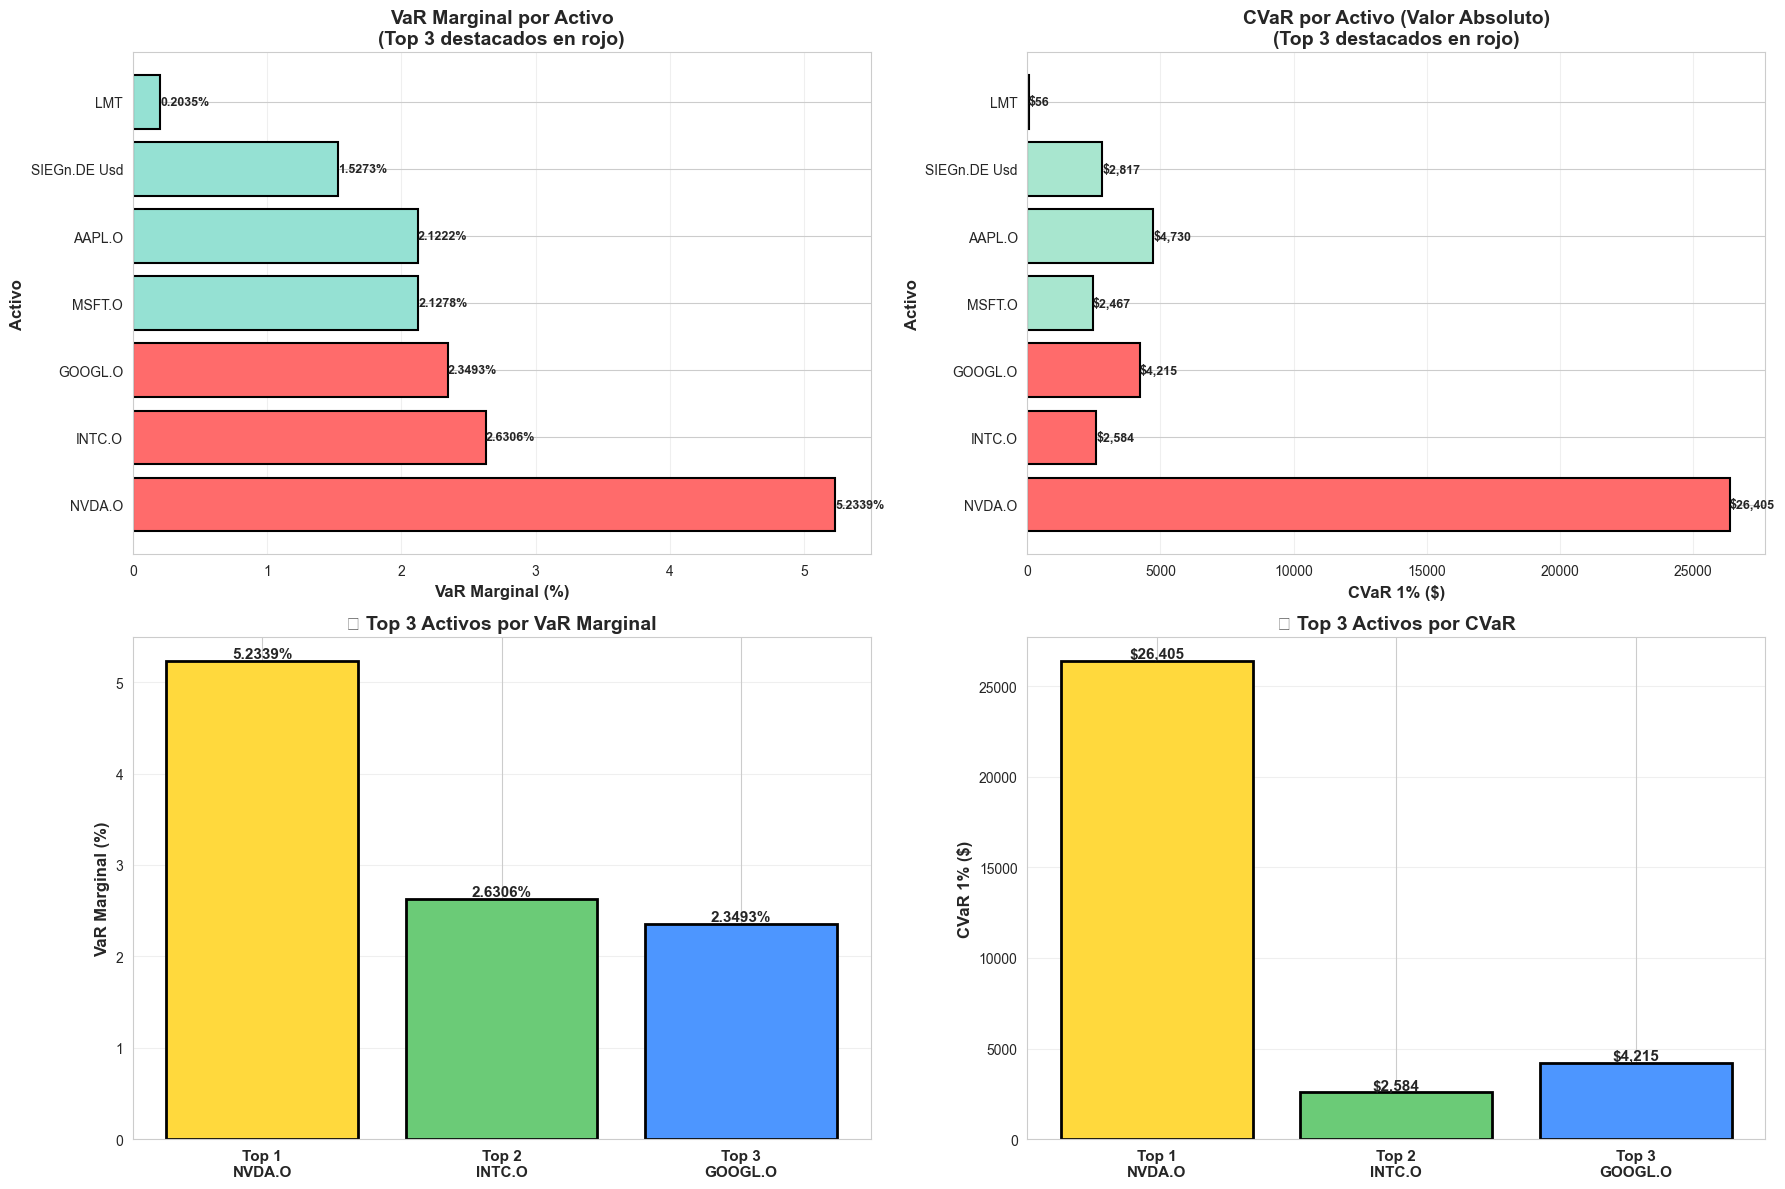

📊 INTERPRETACIÓN DE LAS GRÁFICAS

✅ Gráficos superiores:
   Muestran TODOS los activos, con el Top 3 destacado en ROJO
   Se puede comparar la contribución relativa de cada activo al riesgo total

✅ Gráficos inferiores:
   Enfoque en el Top 3 de activos con mayor contribución al riesgo
   • Amarillo = Top 1 (mayor contribución)
   • Verde = Top 2
   • Azul = Top 3

💡 Observación clave:
   Los 3 activos principales representan 54.08% del portafolio
   pero concentran la mayor parte del riesgo medido por MVaR y CVaR


In [592]:
# ============================================================================
# VISUALIZACIÓN DEL TOP 3 ACTIVOS POR CONTRIBUCIÓN AL RIESGO
# ============================================================================

fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# GRÁFICO 1: VaR Marginal - Comparación de todos los activos con destacado Top 3
ax1 = axes[0, 0]
colores_mvar = ['#FF6B6B' if activo in top3_activos.index else '#95E1D3' 
                for activo in df_riesgo_completo.index]
bars1 = ax1.barh(df_riesgo_completo.index, df_riesgo_completo['MVaR_%'], 
                 color=colores_mvar, edgecolor='black', linewidth=1.5)
ax1.set_xlabel('VaR Marginal (%)', fontsize=12, fontweight='bold')
ax1.set_ylabel('Activo', fontsize=12, fontweight='bold')
ax1.set_title('VaR Marginal por Activo\n(Top 3 destacados en rojo)', 
              fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3, axis='x')

# Añadir etiquetas de valores
for i, (bar, valor) in enumerate(zip(bars1, df_riesgo_completo['MVaR_%'])):
    width = bar.get_width()
    ax1.text(width, bar.get_y() + bar.get_height()/2., 
             f'{valor:.4f}%',
             ha='left', va='center', fontsize=9, fontweight='bold')

# GRÁFICO 2: CVaR - Comparación de todos los activos con destacado Top 3
ax2 = axes[0, 1]
colores_cvar = ['#FF6B6B' if activo in top3_activos.index else '#A8E6CF' 
                for activo in df_riesgo_completo.index]
bars2 = ax2.barh(df_riesgo_completo.index, abs(df_riesgo_completo['CVaR_1pct']), 
                 color=colores_cvar, edgecolor='black', linewidth=1.5)
ax2.set_xlabel('CVaR 1% ($)', fontsize=12, fontweight='bold')
ax2.set_ylabel('Activo', fontsize=12, fontweight='bold')
ax2.set_title('CVaR por Activo (Valor Absoluto)\n(Top 3 destacados en rojo)', 
              fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3, axis='x')

# Añadir etiquetas de valores
for i, (bar, valor) in enumerate(zip(bars2, abs(df_riesgo_completo['CVaR_1pct']))):
    width = bar.get_width()
    ax2.text(width, bar.get_y() + bar.get_height()/2., 
             f'${valor:,.0f}',
             ha='left', va='center', fontsize=9, fontweight='bold')

# GRÁFICO 3: Top 3 - MVaR
ax3 = axes[1, 0]
colores_top3 = ['#FFD93D', '#6BCB77', '#4D96FF']
bars3 = ax3.bar(range(len(top3_activos)), top3_activos['MVaR_%'], 
                color=colores_top3, edgecolor='black', linewidth=2)
ax3.set_xticks(range(len(top3_activos)))
ax3.set_xticklabels([f"Top {i+1}\n{activo}" for i, activo in enumerate(top3_activos.index)], 
                     fontsize=11, fontweight='bold')
ax3.set_ylabel('VaR Marginal (%)', fontsize=12, fontweight='bold')
ax3.set_title('🏆 Top 3 Activos por VaR Marginal', fontsize=14, fontweight='bold')
ax3.grid(True, alpha=0.3, axis='y')

# Añadir valores en las barras
for bar, valor in zip(bars3, top3_activos['MVaR_%']):
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height,
             f'{valor:.4f}%',
             ha='center', va='bottom', fontsize=11, fontweight='bold')

# GRÁFICO 4: Top 3 - CVaR
ax4 = axes[1, 1]
bars4 = ax4.bar(range(len(top3_activos)), abs(top3_activos['CVaR_1pct']), 
                color=colores_top3, edgecolor='black', linewidth=2)
ax4.set_xticks(range(len(top3_activos)))
ax4.set_xticklabels([f"Top {i+1}\n{activo}" for i, activo in enumerate(top3_activos.index)], 
                     fontsize=11, fontweight='bold')
ax4.set_ylabel('CVaR 1% ($)', fontsize=12, fontweight='bold')
ax4.set_title('🏆 Top 3 Activos por CVaR', fontsize=14, fontweight='bold')
ax4.grid(True, alpha=0.3, axis='y')

# Añadir valores en las barras
for bar, valor in zip(bars4, abs(top3_activos['CVaR_1pct'])):
    height = bar.get_height()
    ax4.text(bar.get_x() + bar.get_width()/2., height,
             f'${valor:,.0f}',
             ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

print("="*80)
print("📊 INTERPRETACIÓN DE LAS GRÁFICAS")
print("="*80)
print("\n✅ Gráficos superiores:")
print("   Muestran TODOS los activos, con el Top 3 destacado en ROJO")
print("   Se puede comparar la contribución relativa de cada activo al riesgo total")

print("\n✅ Gráficos inferiores:")
print("   Enfoque en el Top 3 de activos con mayor contribución al riesgo")
print("   • Amarillo = Top 1 (mayor contribución)")
print("   • Verde = Top 2")
print("   • Azul = Top 3")

print("\n💡 Observación clave:")
print(f"   Los 3 activos principales representan {total_peso_top3*100:.2f}% del portafolio")
print(f"   pero concentran la mayor parte del riesgo medido por MVaR y CVaR")
print("="*80)

## 14. Tracking Error vs S&P 500

El **Tracking Error** mide qué tan desviado está el portafolio respecto a un benchmark (en este caso, el S&P 500). Se calcula como la desviación estándar de los retornos activos.

**Fórmulas:**
- Retorno Activo: $Active\ Return_t = r_{p,t} - r_{b,t}$
- Tracking Error: $TE = \sigma(r_p - r_b)$

Donde:
- $r_p$ = retorno del portafolio
- $r_b$ = retorno del benchmark (S&P 500)

### 14.1 Descarga de Datos del S&P 500

In [606]:
# ============================================================================
# DESCARGA DE DATOS DEL S&P 500 DESDE YAHOO FINANCE
# ============================================================================

print("="*80)
print("DESCARGA DE DATOS DEL S&P 500")
print("="*80)

# Instalar yfinance si no está instalado
try:
    import yfinance as yf
    print("\n✅ yfinance ya está instalado")
except ImportError:
    print("\n⚙️  Instalando yfinance...")
    import subprocess
    subprocess.check_call(['pip', 'install', 'yfinance'])
    import yfinance as yf
    print("✅ yfinance instalado correctamente")

# Obtener las fechas del portafolio
fecha_inicio = '2021-09-09'  # Fecha de inicio ajustada para tener suficiente historia
fecha_fin = df['Date'].max()

print(f"\n📅 Rango de fechas del portafolio:")
print(f"   Fecha inicio: {fecha_inicio}")
print(f"   Fecha fin: {fecha_fin}")

# Descargar datos del S&P 500 (ticker: ^GSPC)
print(f"\n📥 Descargando datos del S&P 500 (^GSPC)...")

sp500_prices = None  # Inicializar la variable

try:
    sp500_data = yf.download('^GSPC', start=fecha_inicio, end=fecha_fin, progress=False)
    
    if len(sp500_data) == 0:
        print("⚠️  No se descargaron datos. Intentando con formato de fecha alternativo...")
        # Convertir fechas a formato más compatible
        fecha_inicio_dt = pd.to_datetime(fecha_inicio)
        fecha_fin_dt = pd.to_datetime(fecha_fin)
        sp500_data = yf.download('^GSPC', 
                                 start=fecha_inicio_dt.strftime('%Y-%m-%d'), 
                                 end=fecha_fin_dt.strftime('%Y-%m-%d'), 
                                 progress=False)
    
    if len(sp500_data) > 0:
        print(f"✅ Datos descargados correctamente")
        print(f"   Número de observaciones: {len(sp500_data)}")
        print(f"\n📊 Columnas descargadas: {sp500_data.columns.tolist()}")
        print(f"\n📊 Primeras filas del S&P 500:")
        print(sp500_data.head())
        
        # Manejar nombres de columnas (MultiIndex o simples)
        # Algunas versiones de yfinance devuelven MultiIndex: ('Close', '^GSPC')
        # Otras devuelven nombres simples: 'Close'
        
        if isinstance(sp500_data.columns, pd.MultiIndex):
            # Si es MultiIndex, aplanar los nombres
            print("\n⚙️  Detectado MultiIndex en columnas, aplanando...")
            sp500_data.columns = sp500_data.columns.get_level_values(0)
            print(f"   Nuevas columnas: {sp500_data.columns.tolist()}")
        
        # Intentar obtener el precio de cierre ajustado
        if 'Adj Close' in sp500_data.columns:
            sp500_prices = sp500_data['Adj Close'].copy()
            print("\n✅ Usando columna 'Adj Close'")
        elif 'Close' in sp500_data.columns:
            sp500_prices = sp500_data['Close'].copy()
            print("\n✅ Usando columna 'Close' (Adj Close no disponible)")
        else:
            # Intentar con el nombre completo si aún tiene MultiIndex
            print(f"\n⚠️  Intentando acceder con nombres alternativos...")
            print(f"   Columnas disponibles: {sp500_data.columns.tolist()}")
            # Tomar la primera columna que contenga 'Close'
            close_col = [col for col in sp500_data.columns if 'Close' in str(col)]
            if close_col:
                sp500_prices = sp500_data[close_col[0]].copy()
                print(f"✅ Usando columna '{close_col[0]}'")
            else:
                print("❌ No se encontró columna de precios de cierre")
                sp500_prices = None
        
        if sp500_prices is not None:
            print(f"\n✅ Variable sp500_prices creada correctamente")
            print(f"   Periodo: {sp500_prices.index[0]} a {sp500_prices.index[-1]}")
            print(f"   Número de valores: {len(sp500_prices)}")
        else:
            print("\n❌ No se pudo crear sp500_prices")
    else:
        print("❌ No se descargaron datos")
        sp500_prices = None
    
except Exception as e:
    print(f"❌ Error al descargar datos: {e}")
    import traceback
    print(traceback.format_exc())
    print("\n⚠️  No se pudieron descargar datos reales del S&P 500")
    print("    Verifica la conexión a internet o intenta nuevamente")
    sp500_prices = None

print("\n" + "="*80)

DESCARGA DE DATOS DEL S&P 500

✅ yfinance ya está instalado

📅 Rango de fechas del portafolio:
   Fecha inicio: 2021-09-09
   Fecha fin: 2025-12-01

📥 Descargando datos del S&P 500 (^GSPC)...


C:\Users\Juan Marco\AppData\Local\Temp\ipykernel_12116\3152752897.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  sp500_data = yf.download('^GSPC', start=fecha_inicio, end=fecha_fin, progress=False)


✅ Datos descargados correctamente
   Número de observaciones: 1061

📊 Columnas descargadas: [('Close', '^GSPC'), ('High', '^GSPC'), ('Low', '^GSPC'), ('Open', '^GSPC'), ('Volume', '^GSPC')]

📊 Primeras filas del S&P 500:
Price             Close         High          Low         Open      Volume
Ticker            ^GSPC        ^GSPC        ^GSPC        ^GSPC       ^GSPC
Date                                                                      
2021-09-09  4493.279785  4529.899902  4492.069824  4513.020020  3735390000
2021-09-10  4458.580078  4520.470215  4457.660156  4506.919922  3623180000
2021-09-13  4468.729980  4492.990234  4445.700195  4474.810059  3914220000
2021-09-14  4443.049805  4485.680176  4435.459961  4479.330078  3670460000
2021-09-15  4480.700195  4486.870117  4438.370117  4447.490234  4032020000

⚙️  Detectado MultiIndex en columnas, aplanando...
   Nuevas columnas: ['Close', 'High', 'Low', 'Open', 'Volume']

✅ Usando columna 'Close' (Adj Close no disponible)

✅ Variable 

In [607]:
sp500_data

Price,Close,High,Low,Open,Volume
Date,,,,,
2021-09-09,4493.279785,4529.899902,4492.069824,4513.020020,3735390000
2021-09-10,4458.580078,4520.470215,4457.660156,4506.919922,3623180000
2021-09-13,4468.729980,4492.990234,4445.700195,4474.810059,3914220000
2021-09-14,4443.049805,4485.680176,4435.459961,4479.330078,3670460000
2021-09-15,4480.700195,4486.870117,4438.370117,4447.490234,4032020000
...,...,...,...,...,...
2025-11-21,6602.990234,6660.049805,6521.919922,6555.770020,5929930000
2025-11-24,6705.120117,6715.750000,6630.700195,6636.540039,6039740000
2025-11-25,6765.879883,6776.399902,6659.979980,6697.029785,5003330000


### 14.2 Cálculo del Tracking Error

In [608]:
# ============================================================================
# CÁLCULO DEL TRACKING ERROR
# ============================================================================

print("="*80)
print("CÁLCULO DEL TRACKING ERROR VS S&P 500")
print("="*80)

# Verificar que sp500_prices existe y tiene datos
if 'sp500_prices' not in dir() or sp500_prices is None:
    print("❌ ERROR: sp500_prices no está definido.")
    print("   Por favor, ejecuta primero la celda de descarga de datos del S&P 500.")
else:
    # Resetear el índice del S&P 500 para trabajar con fechas
    sp500_df = pd.DataFrame({
        'Date': sp500_prices.index,
        'SP500_Price': sp500_prices.values
    })

    # Asegurar que las fechas estén en formato datetime
    sp500_df['Date'] = pd.to_datetime(sp500_df['Date'])
    df['Date'] = pd.to_datetime(df['Date'])

    # Merge con el DataFrame del portafolio
    df_tracking = df[['Date', 'Día', 'V0', 'Rendimiento']].copy()
    df_tracking = df_tracking.merge(sp500_df, on='Date', how='inner')

    print(f"\n📊 Datos combinados:")
    print(f"   Observaciones disponibles: {len(df_tracking)}")
    print(f"   Periodo: desde {df_tracking['Date'].min()} hasta {df_tracking['Date'].max()}")

    # Calcular rendimientos del S&P 500
    # Como los datos están ordenados del más reciente al más antiguo, usar shift(-1)
    df_tracking['SP500_Rendimiento'] = (df_tracking['SP500_Price'] / df_tracking['SP500_Price'].shift(-1)) - 1

    # Calcular Active Returns (Retornos Activos)
    # Active Return = Rendimiento del Portafolio - Rendimiento del Benchmark
    df_tracking['Active_Return'] = df_tracking['Rendimiento'] - df_tracking['SP500_Rendimiento']

    # Eliminar NaN
    df_tracking_clean = df_tracking.dropna()

    print(f"\n📈 PRIMERAS 10 OBSERVACIONES:")
    print(df_tracking_clean[['Date', 'Día', 'Rendimiento', 'SP500_Rendimiento', 'Active_Return']].head(10).to_string(index=False))

    # Calcular el Tracking Error
    # TE = desviación estándar de los retornos activos
    tracking_error = df_tracking_clean['Active_Return'].std()

    # Tracking Error anualizado (asumiendo 252 días de trading)
    tracking_error_anualizado = tracking_error * np.sqrt(252)

    # Estadísticas adicionales
    active_return_promedio = df_tracking_clean['Active_Return'].mean()
    active_return_promedio_anualizado = active_return_promedio * 252

    # Correlación entre portafolio y benchmark
    correlacion = df_tracking_clean['Rendimiento'].corr(df_tracking_clean['SP500_Rendimiento'])

    print("\n" + "="*80)
    print("📊 RESULTADOS DEL TRACKING ERROR")
    print("="*80)

    print(f"\n🎯 TRACKING ERROR:")
    print(f"   Diario:                    {tracking_error:.6f} ({tracking_error*100:.4f}%)")
    print(f"   Anualizado (252 días):     {tracking_error_anualizado:.6f} ({tracking_error_anualizado*100:.2f}%)")

    print(f"\n📈 RETORNO ACTIVO PROMEDIO:")
    print(f"   Diario:                    {active_return_promedio:.6f} ({active_return_promedio*100:.4f}%)")
    print(f"   Anualizado (252 días):     {active_return_promedio_anualizado:.6f} ({active_return_promedio_anualizado*100:.2f}%)")

    print(f"\n🔗 CORRELACIÓN CON S&P 500:")
    print(f"   Coeficiente de correlación: {correlacion:.4f}")

    # Information Ratio (si está disponible)
    if tracking_error > 0:
        information_ratio = active_return_promedio / tracking_error
        information_ratio_anualizado = active_return_promedio_anualizado / tracking_error_anualizado
        print(f"\n📊 INFORMATION RATIO:")
        print(f"   Diario:                    {information_ratio:.4f}")
        print(f"   Anualizado:                {information_ratio_anualizado:.4f}")

    print(f"\n💡 INTERPRETACIÓN:")
    print("-" * 80)
    print(f"   • Tracking Error = {tracking_error_anualizado*100:.2f}% anualizado")

    if tracking_error_anualizado < 0.02:  # < 2%
        print(f"   • 🟢 MUY BAJO: El portafolio sigue muy de cerca al S&P 500")
        print(f"   • El portafolio se comporta casi como un fondo índice")
    elif tracking_error_anualizado < 0.05:  # 2-5%
        print(f"   • 🟡 BAJO: El portafolio tiene desviación moderada del S&P 500")
        print(f"   • Estrategia con ligera diferenciación del índice")
    elif tracking_error_anualizado < 0.10:  # 5-10%
        print(f"   • 🟠 MODERADO: El portafolio tiene desviación notable del S&P 500")
        print(f"   • Estrategia activa con selección de valores diferenciada")
    else:  # > 10%
        print(f"   • 🔴 ALTO: El portafolio se desvía significativamente del S&P 500")
        print(f"   • Estrategia muy activa con alta diferenciación")

    print(f"\n   • Correlación = {correlacion:.4f}")
    if correlacion > 0.9:
        print(f"   • 🔗 Muy alta correlación: El portafolio se mueve muy similar al índice")
    elif correlacion > 0.7:
        print(f"   • 🔗 Alta correlación: El portafolio tiende a seguir al índice")
    elif correlacion > 0.5:
        print(f"   • 🔗 Correlación moderada: Cierta independencia del índice")
    else:
        print(f"   • 🔗 Baja correlación: El portafolio es bastante independiente del índice")

    if information_ratio_anualizado > 0:
        print(f"\n   • Information Ratio = {information_ratio_anualizado:.4f}")
        print(f"   • El portafolio genera {active_return_promedio_anualizado*100:.2f}% anual adicional")
        print(f"     vs el S&P 500 con un tracking error de {tracking_error_anualizado*100:.2f}%")
        if information_ratio_anualizado > 0.5:
            print(f"   • 🟢 EXCELENTE: Alta rentabilidad ajustada por desviación")
        elif information_ratio_anualizado > 0:
            print(f"   • 🟡 POSITIVO: Genera valor sobre el benchmark")
        else:
            print(f"   • 🔴 NEGATIVO: Destruye valor vs el benchmark")
            
    print("\n" + "="*80)

CÁLCULO DEL TRACKING ERROR VS S&P 500

📊 Datos combinados:
   Observaciones disponibles: 1046
   Periodo: desde 2021-09-09 00:00:00 hasta 2025-11-28 00:00:00

📈 PRIMERAS 10 OBSERVACIONES:
      Date  Día  Rendimiento  SP500_Rendimiento  Active_Return
2025-11-28    2    -0.001738           0.005355      -0.007093
2025-11-26    3     0.002292           0.006907      -0.004615
2025-11-25    4     0.008189           0.009062      -0.000872
2025-11-24    5    -0.003662           0.015467      -0.019129
2025-11-21    6     0.019635           0.009823       0.009812
2025-11-20    7     0.000801          -0.015567       0.016368
2025-11-19    8    -0.017774           0.003754      -0.021528
2025-11-18    9     0.013012          -0.008256       0.021269
2025-11-17   10    -0.015551          -0.009162      -0.006388
2025-11-14   11    -0.010501          -0.000502      -0.009999

📊 RESULTADOS DEL TRACKING ERROR

🎯 TRACKING ERROR:
   Diario:                    0.018608 (1.8608%)
   Anualizado (252

### 14.3 Visualización del Tracking Error

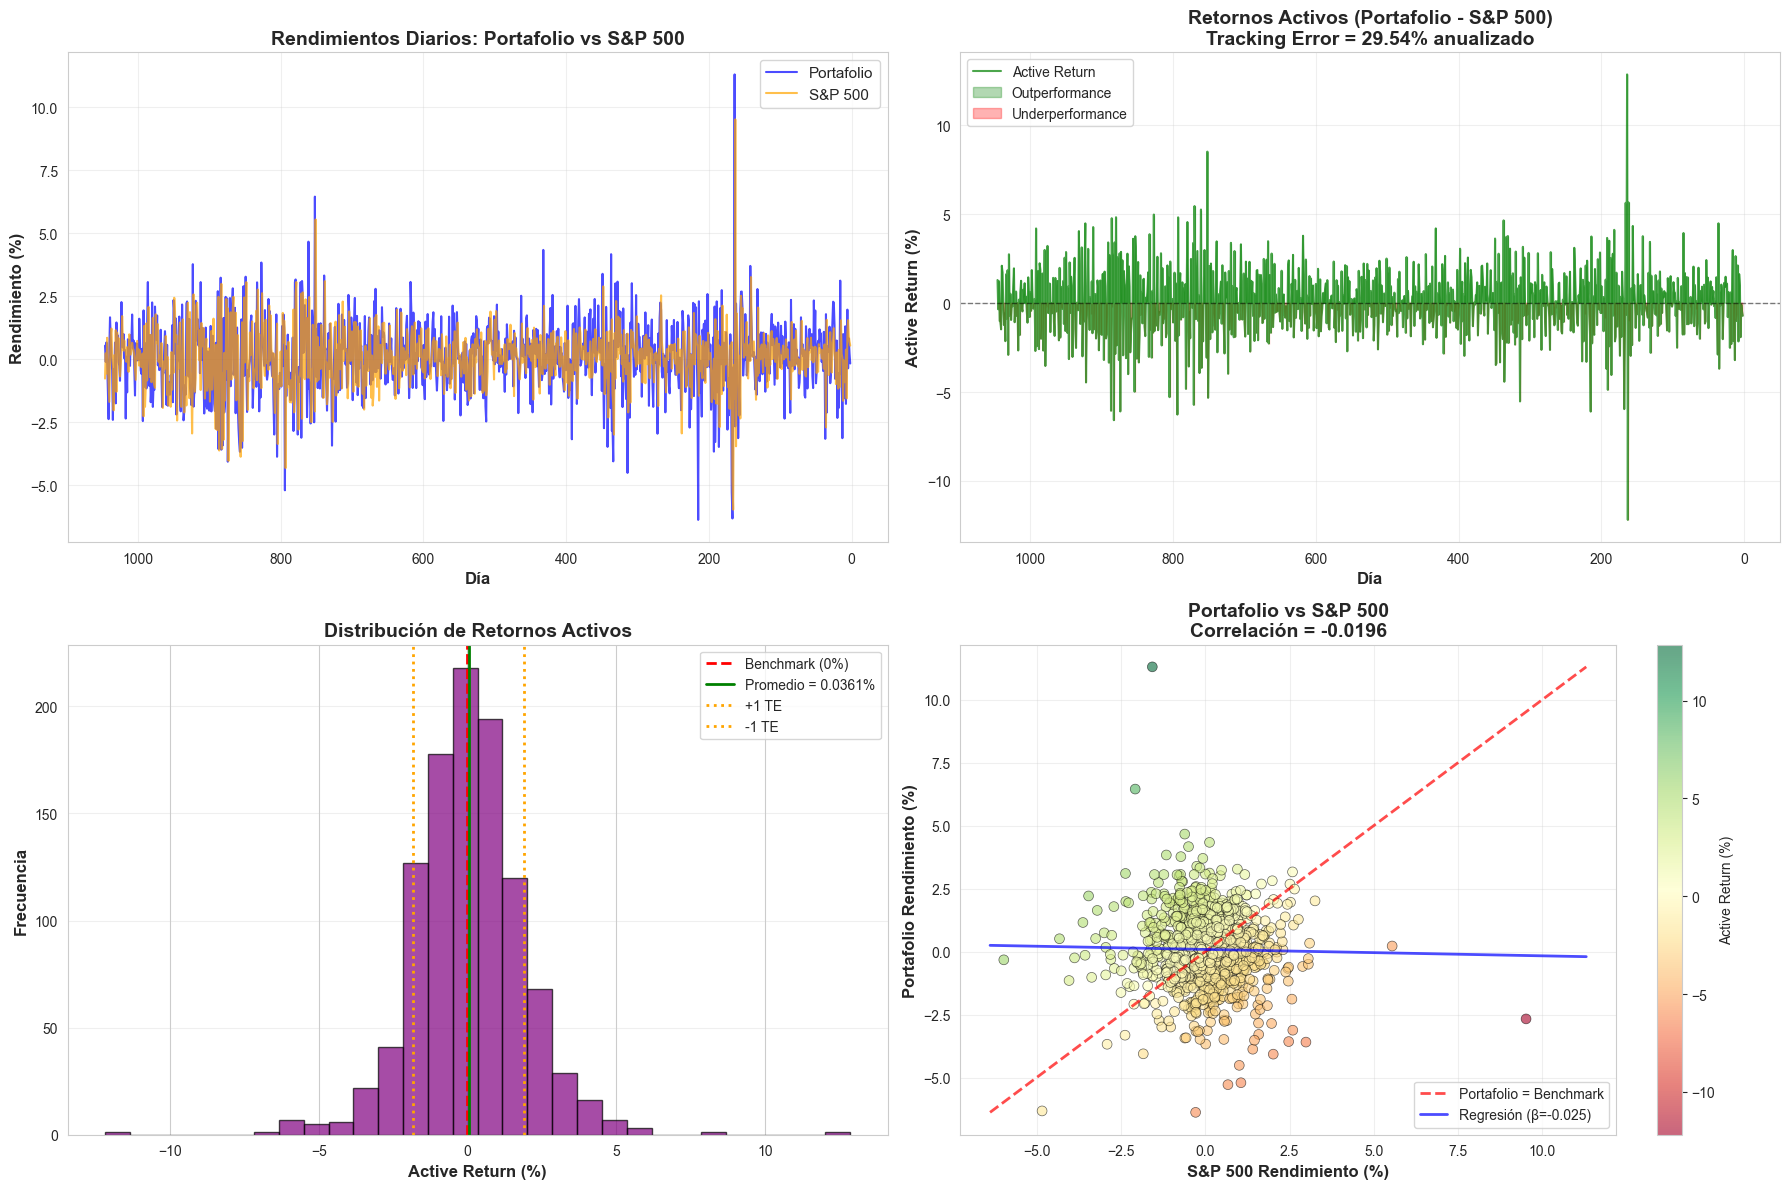

📊 INTERPRETACIÓN DE LAS GRÁFICAS

✅ Gráfico 1 (Superior Izquierdo):
   Compara los rendimientos diarios del portafolio vs el S&P 500
   Muestra qué tan sincronizados están los movimientos

✅ Gráfico 2 (Superior Derecho):
   Muestra los ACTIVE RETURNS (diferencia entre portafolio y benchmark)
   • Verde = Días donde el portafolio supera al S&P 500
   • Rojo = Días donde el portafolio queda por debajo del S&P 500

✅ Gráfico 3 (Inferior Izquierdo):
   Distribución de los retornos activos
   • Las líneas naranjas muestran ±1 Tracking Error
   • Muestra la dispersión típica respecto al benchmark

✅ Gráfico 4 (Inferior Derecho):
   Scatter plot que muestra la relación entre portafolio y benchmark
   • Línea roja = portafolio = benchmark (tracking perfecto)
   • Línea azul = regresión (pendiente = beta)
   • Color de puntos = Active Return (verde = outperform, rojo = underperform)

📊 RESUMEN DE PERFORMANCE:
--------------------------------------------------------------------------------
   Dí

In [609]:
# ============================================================================
# VISUALIZACIÓN DEL TRACKING ERROR
# ============================================================================

fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# GRÁFICO 1: Rendimientos del Portafolio vs S&P 500
ax1 = axes[0, 0]
ax1.plot(df_tracking_clean['Día'], df_tracking_clean['Rendimiento'] * 100, 
         linewidth=1.5, color='blue', label='Portafolio', alpha=0.7)
ax1.plot(df_tracking_clean['Día'], df_tracking_clean['SP500_Rendimiento'] * 100, 
         linewidth=1.5, color='orange', label='S&P 500', alpha=0.7)
ax1.set_xlabel('Día', fontsize=12, fontweight='bold')
ax1.set_ylabel('Rendimiento (%)', fontsize=12, fontweight='bold')
ax1.set_title('Rendimientos Diarios: Portafolio vs S&P 500', fontsize=14, fontweight='bold')
ax1.legend(fontsize=11)
ax1.grid(True, alpha=0.3)
ax1.invert_xaxis()

# GRÁFICO 2: Active Returns (Retornos Activos)
ax2 = axes[0, 1]
ax2.plot(df_tracking_clean['Día'], df_tracking_clean['Active_Return'] * 100, 
         linewidth=1.5, color='green', label='Active Return', alpha=0.7)
ax2.axhline(y=0, color='black', linestyle='--', linewidth=1, alpha=0.5)
ax2.fill_between(df_tracking_clean['Día'], 0, df_tracking_clean['Active_Return'] * 100,
                  where=(df_tracking_clean['Active_Return'] > 0), alpha=0.3, color='green',
                  label='Outperformance')
ax2.fill_between(df_tracking_clean['Día'], 0, df_tracking_clean['Active_Return'] * 100,
                  where=(df_tracking_clean['Active_Return'] <= 0), alpha=0.3, color='red',
                  label='Underperformance')
ax2.set_xlabel('Día', fontsize=12, fontweight='bold')
ax2.set_ylabel('Active Return (%)', fontsize=12, fontweight='bold')
ax2.set_title(f'Retornos Activos (Portafolio - S&P 500)\nTracking Error = {tracking_error_anualizado*100:.2f}% anualizado', 
              fontsize=14, fontweight='bold')
ax2.legend(fontsize=10)
ax2.grid(True, alpha=0.3)
ax2.invert_xaxis()

# GRÁFICO 3: Distribución de Active Returns
ax3 = axes[1, 0]
ax3.hist(df_tracking_clean['Active_Return'] * 100, bins=30, edgecolor='black', 
         alpha=0.7, color='purple')
ax3.axvline(x=0, color='red', linestyle='--', linewidth=2, label='Benchmark (0%)')
ax3.axvline(x=active_return_promedio * 100, color='green', linestyle='-', linewidth=2,
            label=f'Promedio = {active_return_promedio*100:.4f}%')
ax3.axvline(x=active_return_promedio * 100 + tracking_error * 100, color='orange', 
            linestyle=':', linewidth=2, label=f'+1 TE')
ax3.axvline(x=active_return_promedio * 100 - tracking_error * 100, color='orange', 
            linestyle=':', linewidth=2, label=f'-1 TE')
ax3.set_xlabel('Active Return (%)', fontsize=12, fontweight='bold')
ax3.set_ylabel('Frecuencia', fontsize=12, fontweight='bold')
ax3.set_title('Distribución de Retornos Activos', fontsize=14, fontweight='bold')
ax3.legend(fontsize=10)
ax3.grid(True, alpha=0.3, axis='y')

# GRÁFICO 4: Scatter Plot - Portafolio vs S&P 500
ax4 = axes[1, 1]
scatter = ax4.scatter(df_tracking_clean['SP500_Rendimiento'] * 100, 
                     df_tracking_clean['Rendimiento'] * 100,
                     c=df_tracking_clean['Active_Return'] * 100, 
                     cmap='RdYlGn', alpha=0.6, s=50, edgecolors='black', linewidth=0.5)

# Línea de 45 grados (donde portafolio = benchmark)
min_val = min(df_tracking_clean['SP500_Rendimiento'].min(), df_tracking_clean['Rendimiento'].min()) * 100
max_val = max(df_tracking_clean['SP500_Rendimiento'].max(), df_tracking_clean['Rendimiento'].max()) * 100
ax4.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2, 
         label='Portafolio = Benchmark', alpha=0.7)

# Línea de regresión
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(
    df_tracking_clean['SP500_Rendimiento'] * 100, 
    df_tracking_clean['Rendimiento'] * 100
)
line_x = np.linspace(min_val, max_val, 100)
line_y = slope * line_x + intercept
ax4.plot(line_x, line_y, 'b-', linewidth=2, alpha=0.7,
         label=f'Regresión (β={slope:.3f})')

ax4.set_xlabel('S&P 500 Rendimiento (%)', fontsize=12, fontweight='bold')
ax4.set_ylabel('Portafolio Rendimiento (%)', fontsize=12, fontweight='bold')
ax4.set_title(f'Portafolio vs S&P 500\nCorrelación = {correlacion:.4f}', 
              fontsize=14, fontweight='bold')
ax4.legend(fontsize=10)
ax4.grid(True, alpha=0.3)

# Colorbar
cbar = plt.colorbar(scatter, ax=ax4)
cbar.set_label('Active Return (%)', fontsize=10)

plt.tight_layout()
plt.show()

print("="*80)
print("📊 INTERPRETACIÓN DE LAS GRÁFICAS")
print("="*80)

print("\n✅ Gráfico 1 (Superior Izquierdo):")
print("   Compara los rendimientos diarios del portafolio vs el S&P 500")
print("   Muestra qué tan sincronizados están los movimientos")

print("\n✅ Gráfico 2 (Superior Derecho):")
print("   Muestra los ACTIVE RETURNS (diferencia entre portafolio y benchmark)")
print("   • Verde = Días donde el portafolio supera al S&P 500")
print("   • Rojo = Días donde el portafolio queda por debajo del S&P 500")

print("\n✅ Gráfico 3 (Inferior Izquierdo):")
print("   Distribución de los retornos activos")
print("   • Las líneas naranjas muestran ±1 Tracking Error")
print("   • Muestra la dispersión típica respecto al benchmark")

print("\n✅ Gráfico 4 (Inferior Derecho):")
print("   Scatter plot que muestra la relación entre portafolio y benchmark")
print("   • Línea roja = portafolio = benchmark (tracking perfecto)")
print("   • Línea azul = regresión (pendiente = beta)")
print("   • Color de puntos = Active Return (verde = outperform, rojo = underperform)")

# Análisis de días de outperformance
dias_outperformance = (df_tracking_clean['Active_Return'] > 0).sum()
dias_underperformance = (df_tracking_clean['Active_Return'] < 0).sum()
pct_outperformance = (dias_outperformance / len(df_tracking_clean)) * 100

print("\n📊 RESUMEN DE PERFORMANCE:")
print("-" * 80)
print(f"   Días de Outperformance:    {dias_outperformance} ({pct_outperformance:.1f}%)")
print(f"   Días de Underperformance:  {dias_underperformance} ({100-pct_outperformance:.1f}%)")
print(f"   Beta del portafolio:        {slope:.4f}")

if slope > 1:
    print(f"   • Beta > 1: El portafolio es más volátil que el S&P 500")
elif slope < 1:
    print(f"   • Beta < 1: El portafolio es menos volátil que el S&P 500")
else:
    print(f"   • Beta ≈ 1: El portafolio tiene volatilidad similar al S&P 500")

print("="*80)

## 15. Métricas de Performance del Portafolio (BONUS)

En esta sección calcularemos métricas adicionales para evaluar el desempeño del portafolio:
- **Sharpe Ratio**: Retorno ajustado por riesgo (usando tasa libre de riesgo)
- **Sortino Ratio**: Similar al Sharpe pero solo considera volatilidad a la baja
- **Jarque-Bera Test**: Prueba de normalidad de los rendimientos

### 15.1 Sharpe Ratio

In [610]:
# ============================================================================
# SHARPE RATIO
# ============================================================================

print("="*80)
print("SHARPE RATIO - RETORNO AJUSTADO POR RIESGO")
print("="*80)

# El Sharpe Ratio mide el exceso de retorno por unidad de riesgo
# Fórmula: Sharpe = (R_p - R_f) / σ_p
# Donde:
#   R_p = retorno del portafolio
#   R_f = tasa libre de riesgo
#   σ_p = desviación estándar del portafolio

# Obtener rendimientos del portafolio (sin NaN)
rendimientos_portafolio = df['Rendimiento'].dropna()

# Estadísticas básicas
retorno_promedio_diario = rendimientos_portafolio.mean()
retorno_promedio_anual = retorno_promedio_diario * 252
volatilidad_diaria = rendimientos_portafolio.std()
volatilidad_anual = volatilidad_diaria * np.sqrt(252)

# Tasa libre de riesgo (asumiendo 4% anual ~ US Treasury)
# Puedes ajustar este valor según el periodo de análisis
tasa_libre_riesgo_anual = 0.04  # 4% anual
tasa_libre_riesgo_diaria = tasa_libre_riesgo_anual / 252

print(f"\n📊 ESTADÍSTICAS DEL PORTAFOLIO:")
print(f"   Retorno promedio diario:    {retorno_promedio_diario:.6f} ({retorno_promedio_diario*100:.4f}%)")
print(f"   Retorno promedio anual:     {retorno_promedio_anual:.6f} ({retorno_promedio_anual*100:.2f}%)")
print(f"   Volatilidad diaria:         {volatilidad_diaria:.6f} ({volatilidad_diaria*100:.4f}%)")
print(f"   Volatilidad anual:          {volatilidad_anual:.6f} ({volatilidad_anual*100:.2f}%)")

print(f"\n📈 TASA LIBRE DE RIESGO:")
print(f"   Anual:                      {tasa_libre_riesgo_anual:.4f} ({tasa_libre_riesgo_anual*100:.2f}%)")
print(f"   Diaria:                     {tasa_libre_riesgo_diaria:.6f} ({tasa_libre_riesgo_diaria*100:.4f}%)")

# Calcular Sharpe Ratio
# Versión diaria
exceso_retorno_diario = retorno_promedio_diario - tasa_libre_riesgo_diaria
sharpe_ratio_diario = exceso_retorno_diario / volatilidad_diaria

# Versión anualizada (más común)
exceso_retorno_anual = retorno_promedio_anual - tasa_libre_riesgo_anual
sharpe_ratio_anual = exceso_retorno_anual / volatilidad_anual

print("\n" + "="*80)
print("📊 SHARPE RATIO")
print("="*80)

print(f"\n🎯 Sharpe Ratio Diario:       {sharpe_ratio_diario:.4f}")
print(f"🎯 Sharpe Ratio Anualizado:   {sharpe_ratio_anual:.4f}")

print(f"\n   Exceso de retorno diario:   {exceso_retorno_diario:.6f} ({exceso_retorno_diario*100:.4f}%)")
print(f"   Exceso de retorno anual:    {exceso_retorno_anual:.6f} ({exceso_retorno_anual*100:.2f}%)")

print(f"\n💡 INTERPRETACIÓN:")
print("-" * 80)

if sharpe_ratio_anual < 0:
    print(f"   • 🔴 NEGATIVO ({sharpe_ratio_anual:.2f}): Rendimiento menor que la tasa libre de riesgo")
    print(f"   • El portafolio NO compensa el riesgo asumido")
elif sharpe_ratio_anual < 1.0:
    print(f"   • 🟡 BAJO ({sharpe_ratio_anual:.2f}): Rendimiento ajustado por riesgo limitado")
    print(f"   • El portafolio genera algo de valor pero es modesto")
elif sharpe_ratio_anual < 2.0:
    print(f"   • 🟢 BUENO ({sharpe_ratio_anual:.2f}): Buen rendimiento ajustado por riesgo")
    print(f"   • El portafolio compensa adecuadamente el riesgo")
elif sharpe_ratio_anual < 3.0:
    print(f"   • 🟢 MUY BUENO ({sharpe_ratio_anual:.2f}): Excelente rendimiento ajustado por riesgo")
    print(f"   • El portafolio genera valor significativo por unidad de riesgo")
else:
    print(f"   • 🟢 EXCEPCIONAL ({sharpe_ratio_anual:.2f}): Rendimiento sobresaliente")
    print(f"   • El portafolio tiene un desempeño excepcional ajustado por riesgo")

print(f"\n   Estándares de referencia:")
print(f"   • Sharpe < 0:    Destruye valor vs tasa libre de riesgo")
print(f"   • Sharpe 0-1:    Rendimiento aceptable pero modesto")
print(f"   • Sharpe 1-2:    Buen rendimiento ajustado por riesgo")
print(f"   • Sharpe 2-3:    Muy buen rendimiento")
print(f"   • Sharpe > 3:    Excepcional (poco común en periodos largos)")

print("\n" + "="*80)

SHARPE RATIO - RETORNO AJUSTADO POR RIESGO

📊 ESTADÍSTICAS DEL PORTAFOLIO:
   Retorno promedio diario:    0.000831 (0.0831%)
   Retorno promedio anual:     0.209326 (20.93%)
   Volatilidad diaria:         0.014513 (1.4513%)
   Volatilidad anual:          0.230383 (23.04%)

📈 TASA LIBRE DE RIESGO:
   Anual:                      0.0400 (4.00%)
   Diaria:                     0.000159 (0.0159%)

📊 SHARPE RATIO

🎯 Sharpe Ratio Diario:       0.0463
🎯 Sharpe Ratio Anualizado:   0.7350

   Exceso de retorno diario:   0.000672 (0.0672%)
   Exceso de retorno anual:    0.169326 (16.93%)

💡 INTERPRETACIÓN:
--------------------------------------------------------------------------------
   • 🟡 BAJO (0.73): Rendimiento ajustado por riesgo limitado
   • El portafolio genera algo de valor pero es modesto

   Estándares de referencia:
   • Sharpe < 0:    Destruye valor vs tasa libre de riesgo
   • Sharpe 0-1:    Rendimiento aceptable pero modesto
   • Sharpe 1-2:    Buen rendimiento ajustado por riesgo

### 15.2 Sortino Ratio

In [611]:
# ============================================================================
# SORTINO RATIO
# ============================================================================

print("="*80)
print("SORTINO RATIO - RETORNO AJUSTADO POR RIESGO A LA BAJA")
print("="*80)

# El Sortino Ratio es similar al Sharpe pero solo penaliza la volatilidad NEGATIVA
# Fórmula: Sortino = (R_p - R_f) / σ_downside
# Donde:
#   R_p = retorno del portafolio
#   R_f = tasa libre de riesgo (o MAR - Minimum Acceptable Return)
#   σ_downside = desviación estándar de los rendimientos NEGATIVOS

print(f"\n📊 CÁLCULO DE VOLATILIDAD A LA BAJA:")

# Identificar rendimientos negativos (por debajo de la tasa libre de riesgo)
# MAR (Minimum Acceptable Return) = tasa libre de riesgo
MAR = tasa_libre_riesgo_diaria

# Rendimientos por debajo del MAR
rendimientos_negativos = rendimientos_portafolio[rendimientos_portafolio < MAR]
excesos_negativos = rendimientos_negativos - MAR

print(f"   Total de observaciones:           {len(rendimientos_portafolio)}")
print(f"   Días con rendimiento < MAR:       {len(rendimientos_negativos)} ({len(rendimientos_negativos)/len(rendimientos_portafolio)*100:.1f}%)")
print(f"   Días con rendimiento ≥ MAR:       {len(rendimientos_portafolio) - len(rendimientos_negativos)} ({(len(rendimientos_portafolio) - len(rendimientos_negativos))/len(rendimientos_portafolio)*100:.1f}%)")

# Calcular downside deviation (desviación a la baja)
# Se usa la raíz cuadrada de la media de los cuadrados de las desviaciones negativas
if len(excesos_negativos) > 0:
    # Downside deviation = sqrt(sum((r - MAR)^2) / n) para r < MAR
    downside_deviation_diaria = np.sqrt((excesos_negativos ** 2).sum() / len(rendimientos_portafolio))
    downside_deviation_anual = downside_deviation_diaria * np.sqrt(252)
else:
    downside_deviation_diaria = 0.0001  # Evitar división por cero
    downside_deviation_anual = downside_deviation_diaria * np.sqrt(252)
    print("   ⚠️  No hay rendimientos negativos (caso excepcional)")

print(f"\n   Downside Deviation diaria:        {downside_deviation_diaria:.6f} ({downside_deviation_diaria*100:.4f}%)")
print(f"   Downside Deviation anual:         {downside_deviation_anual:.6f} ({downside_deviation_anual*100:.2f}%)")

# Comparar con volatilidad total
print(f"\n   Volatilidad total (σ):            {volatilidad_diaria:.6f} ({volatilidad_diaria*100:.4f}%)")
print(f"   Ratio Downside/Total:             {downside_deviation_diaria/volatilidad_diaria:.2%}")

# Calcular Sortino Ratio
sortino_ratio_diario = exceso_retorno_diario / downside_deviation_diaria
sortino_ratio_anual = exceso_retorno_anual / downside_deviation_anual

print("\n" + "="*80)
print("📊 SORTINO RATIO")
print("="*80)

print(f"\n🎯 Sortino Ratio Diario:           {sortino_ratio_diario:.4f}")
print(f"🎯 Sortino Ratio Anualizado:       {sortino_ratio_anual:.4f}")

print(f"\n📊 COMPARACIÓN CON SHARPE RATIO:")
print(f"   Sharpe Ratio:                    {sharpe_ratio_anual:.4f}")
print(f"   Sortino Ratio:                   {sortino_ratio_anual:.4f}")
print(f"   Diferencia:                      {sortino_ratio_anual - sharpe_ratio_anual:.4f}")

print(f"\n💡 INTERPRETACIÓN:")
print("-" * 80)

if sortino_ratio_anual > sharpe_ratio_anual:
    diferencia_pct = ((sortino_ratio_anual / sharpe_ratio_anual) - 1) * 100
    print(f"   • ✅ Sortino > Sharpe ({diferencia_pct:.1f}% mayor)")
    print(f"   • El portafolio tiene relativamente POCA volatilidad a la baja")
    print(f"   • Las caídas son menos frecuentes o severas que la volatilidad general")
    print(f"   • POSITIVO: La volatilidad viene más del lado positivo (ganancias)")
else:
    print(f"   • El Sortino es similar o menor al Sharpe")
    print(f"   • Volatilidad distribuida equilibradamente entre ganancias y pérdidas")

print(f"\n   Estándares de referencia (Sortino):")
print(f"   • Sortino < 0:    Destruye valor")
print(f"   • Sortino 0-1:    Aceptable")
print(f"   • Sortino 1-2:    Bueno")
print(f"   • Sortino 2-3:    Muy bueno")
print(f"   • Sortino > 3:    Excepcional")

print(f"\n   📌 Ventaja del Sortino sobre el Sharpe:")
print(f"      El Sortino NO penaliza la volatilidad POSITIVA (ganancias)")
print(f"      Solo considera el riesgo de pérdidas (downside risk)")

print("\n" + "="*80)

SORTINO RATIO - RETORNO AJUSTADO POR RIESGO A LA BAJA

📊 CÁLCULO DE VOLATILIDAD A LA BAJA:
   Total de observaciones:           1062
   Días con rendimiento < MAR:       513 (48.3%)
   Días con rendimiento ≥ MAR:       549 (51.7%)

   Downside Deviation diaria:        0.009924 (0.9924%)
   Downside Deviation anual:         0.157534 (15.75%)

   Volatilidad total (σ):            0.014513 (1.4513%)
   Ratio Downside/Total:             68.38%

📊 SORTINO RATIO

🎯 Sortino Ratio Diario:           0.0677
🎯 Sortino Ratio Anualizado:       1.0749

📊 COMPARACIÓN CON SHARPE RATIO:
   Sharpe Ratio:                    0.7350
   Sortino Ratio:                   1.0749
   Diferencia:                      0.3399

💡 INTERPRETACIÓN:
--------------------------------------------------------------------------------
   • ✅ Sortino > Sharpe (46.2% mayor)
   • El portafolio tiene relativamente POCA volatilidad a la baja
   • Las caídas son menos frecuentes o severas que la volatilidad general
   • POSITIVO: L

### 15.3 Test de Jarque-Bera (Normalidad)

In [612]:
# ============================================================================
# TEST DE JARQUE-BERA (PRUEBA DE NORMALIDAD)
# ============================================================================

print("="*80)
print("TEST DE JARQUE-BERA - PRUEBA DE NORMALIDAD")
print("="*80)

# El test de Jarque-Bera evalúa si los rendimientos siguen una distribución normal
# Se basa en asimetría (skewness) y curtosis (kurtosis)
# 
# Fórmula: JB = (n/6) * [S^2 + (K-3)^2/4]
# Donde:
#   n = número de observaciones
#   S = skewness (asimetría)
#   K = kurtosis (curtosis)
#
# H0 (hipótesis nula): Los datos siguen una distribución normal
# H1 (hipótesis alternativa): Los datos NO siguen una distribución normal

from scipy import stats

# Calcular estadísticas
n = len(rendimientos_portafolio)
skewness = rendimientos_portafolio.skew()
kurtosis = rendimientos_portafolio.kurtosis()  # Excess kurtosis (K - 3)
kurtosis_raw = kurtosis + 3  # Kurtosis total

print(f"\n📊 ESTADÍSTICAS DE LOS RENDIMIENTOS:")
print(f"   Número de observaciones:      {n}")
print(f"   Media:                        {rendimientos_portafolio.mean():.6f}")
print(f"   Desviación estándar:          {rendimientos_portafolio.std():.6f}")
print(f"   Mínimo:                       {rendimientos_portafolio.min():.6f}")
print(f"   Máximo:                       {rendimientos_portafolio.max():.6f}")

print(f"\n📈 ASIMETRÍA (SKEWNESS):")
print(f"   Skewness:                     {skewness:.4f}")
if abs(skewness) < 0.5:
    print(f"   → Distribución aproximadamente simétrica")
elif skewness < -0.5:
    print(f"   → Asimetría NEGATIVA (cola izquierda más larga)")
    print(f"   → Más días con pérdidas extremas que ganancias extremas")
else:
    print(f"   → Asimetría POSITIVA (cola derecha más larga)")
    print(f"   → Más días con ganancias extremas que pérdidas extremas")

print(f"\n📉 CURTOSIS (KURTOSIS):")
print(f"   Kurtosis (excess):            {kurtosis:.4f}")
print(f"   Kurtosis (total):             {kurtosis_raw:.4f}")
print(f"   (Distribución normal tiene kurtosis = 3 o excess kurtosis = 0)")

if abs(kurtosis) < 1:
    print(f"   → Similar a distribución normal (mesocúrtica)")
elif kurtosis > 1:
    print(f"   → Leptocúrtica (colas más pesadas que la normal)")
    print(f"   → Mayor probabilidad de eventos extremos")
    print(f"   → ⚠️  Más riesgo de pérdidas/ganancias extremas")
else:
    print(f"   → Platicúrtica (colas más ligeras que la normal)")
    print(f"   → Menor probabilidad de eventos extremos")

# Realizar test de Jarque-Bera
jb_statistic, jb_pvalue = stats.jarque_bera(rendimientos_portafolio)

print("\n" + "="*80)
print("📊 RESULTADOS DEL TEST DE JARQUE-BERA")
print("="*80)

print(f"\n🎯 Estadístico JB:               {jb_statistic:.4f}")
print(f"🎯 P-value:                      {jb_pvalue:.6f}")

# Niveles de significancia comunes
alpha_001 = 0.01  # 99% confianza
alpha_005 = 0.05  # 95% confianza
alpha_010 = 0.10  # 90% confianza

print(f"\n💡 INTERPRETACIÓN:")
print("-" * 80)

print(f"\nHipótesis:")
print(f"   H0: Los rendimientos siguen una distribución NORMAL")
print(f"   H1: Los rendimientos NO siguen una distribución normal")

print(f"\nDecisión con diferentes niveles de significancia:")

if jb_pvalue > alpha_010:
    print(f"   ✅ α = 10% (p = {jb_pvalue:.4f} > 0.10): NO rechazar H0")
    print(f"      → Los datos SON consistentes con normalidad al 90% confianza")
else:
    print(f"   ❌ α = 10% (p = {jb_pvalue:.4f} ≤ 0.10): RECHAZAR H0")
    print(f"      → Los datos NO son normales al 90% confianza")

if jb_pvalue > alpha_005:
    print(f"   ✅ α = 5% (p = {jb_pvalue:.4f} > 0.05): NO rechazar H0")
    print(f"      → Los datos SON consistentes con normalidad al 95% confianza")
else:
    print(f"   ❌ α = 5% (p = {jb_pvalue:.4f} ≤ 0.05): RECHAZAR H0")
    print(f"      → Los datos NO son normales al 95% confianza")

if jb_pvalue > alpha_001:
    print(f"   ✅ α = 1% (p = {jb_pvalue:.4f} > 0.01): NO rechazar H0")
    print(f"      → Los datos SON consistentes con normalidad al 99% confianza")
else:
    print(f"   ❌ α = 1% (p = {jb_pvalue:.4f} ≤ 0.01): RECHAZAR H0")
    print(f"      → Los datos NO son normales al 99% confianza")

print(f"\n📌 CONCLUSIÓN:")
if jb_pvalue < 0.05:
    print(f"   Los rendimientos del portafolio NO siguen una distribución normal")
    print(f"   (rechazamos H0 al nivel de significancia estándar del 5%)")
    print(f"\n   Implicaciones:")
    print(f"   • Los modelos que asumen normalidad (ej: VaR paramétrico) pueden")
    print(f"     SUBESTIMAR el riesgo real")
    print(f"   • Métodos no paramétricos (VaR histórico) son más apropiados")
    print(f"   • Considerar modelos que capturen colas pesadas (ej: t-Student)")
else:
    print(f"   Los rendimientos del portafolio SON consistentes con normalidad")
    print(f"   (no rechazamos H0 al nivel de significancia del 5%)")
    print(f"\n   Implicaciones:")
    print(f"   • Los modelos paramétricos basados en normalidad son apropiados")
    print(f"   • El VaR paramétrico es una buena medida de riesgo")

print("\n" + "="*80)

TEST DE JARQUE-BERA - PRUEBA DE NORMALIDAD

📊 ESTADÍSTICAS DE LOS RENDIMIENTOS:
   Número de observaciones:      1062
   Media:                        0.000831
   Desviación estándar:          0.014513
   Mínimo:                       -0.063822
   Máximo:                       0.113003

📈 ASIMETRÍA (SKEWNESS):
   Skewness:                     0.1801
   → Distribución aproximadamente simétrica

📉 CURTOSIS (KURTOSIS):
   Kurtosis (excess):            4.3332
   Kurtosis (total):             7.3332
   (Distribución normal tiene kurtosis = 3 o excess kurtosis = 0)
   → Leptocúrtica (colas más pesadas que la normal)
   → Mayor probabilidad de eventos extremos
   → ⚠️  Más riesgo de pérdidas/ganancias extremas

📊 RESULTADOS DEL TEST DE JARQUE-BERA

🎯 Estadístico JB:               826.6433
🎯 P-value:                      0.000000

💡 INTERPRETACIÓN:
--------------------------------------------------------------------------------

Hipótesis:
   H0: Los rendimientos siguen una distribución NORMAL